In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import numpy as np
import sys
import pickle
import time
sys.path.append("/home/lemma/Documents/MAC-POSTS/side_project/network_builder")
import matplotlib.pyplot as plt

from matplotlib import colors
import matplotlib
import six
import matplotlib.dates as mdates
import datetime
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use('seaborn-poster')

In [3]:
from models import *
import MNMAPI
from MNM_mcnb import *

In [4]:
from exp_config import *

Creating route for: single_drive
Creating route for: single_drive
Creating route for: multiple_drive
Creating route for: metro
Creating route for: pnr
Creating route for: pnr
Creating route for: pnr
Creating route for: pnr
Creating route for: single_drive
Creating route for: single_drive
Creating route for: multiple_drive
Creating route for: transit
Creating route for: pnr
Creating route for: single_drive
Creating route for: single_drive
Creating route for: multiple_drive
Creating route for: pnr


In [5]:
data_folder = '../data/input_files_small_multiclass'
nb = MNM_network_builder()
nb.load_from_folder(data_folder)

In [6]:
mcdue = Multimode_DUE(nb)

Init simulation


In [7]:
init_path_matrix = mcdue.init_path_matrix(path_list, demand_dict)

In [8]:
# start_time = time.time()
# path_matrix1, _, gap_rec1 = mcdue.solve(init_path_matrix, path_list, demand_dict, ab_dict, 
#                              choice_dict, num_iters = 100, gd_method = 'GP2', name = 'direct2')
# print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
# start_time = time.time()
# path_matrix1, _, gap_rec1 = mcdue.solve(init_path_matrix, path_list, demand_dict, ab_dict, 
#                              choice_dict, num_iters = 100, gd_method = 'GP2', name = 'cvx')
# print("--- %s seconds ---" % (time.time() - start_time))

In [10]:
# nb = MNM_network_builder()
# nb.load_from_folder('cache')
# link_ID_list = list(map(lambda x: x.ID, nb.link_list))
# dta = MNMAPI.mcdta_api()
# # print '15'
# dta.initialize('cache')
# # print '16'
# dta.register_links(link_ID_list)
# # print '17'
# dta.run_whole()

In [11]:
# path_matrix2, d2, gap_rec2 = mcdue.solve(init_path_matrix, path_list, demand_dict, ab_dict, 
#                              choice_dict, num_iters = 100, gd_method = 'MSA', name = "basic_result")

## Convergece curve

In [12]:
_, gap_rec1 = pickle.load(open('GPdirect.pickle', 'rb'))
_, gap_rec2 = pickle.load(open('GP2cvx.pickle', 'rb'))

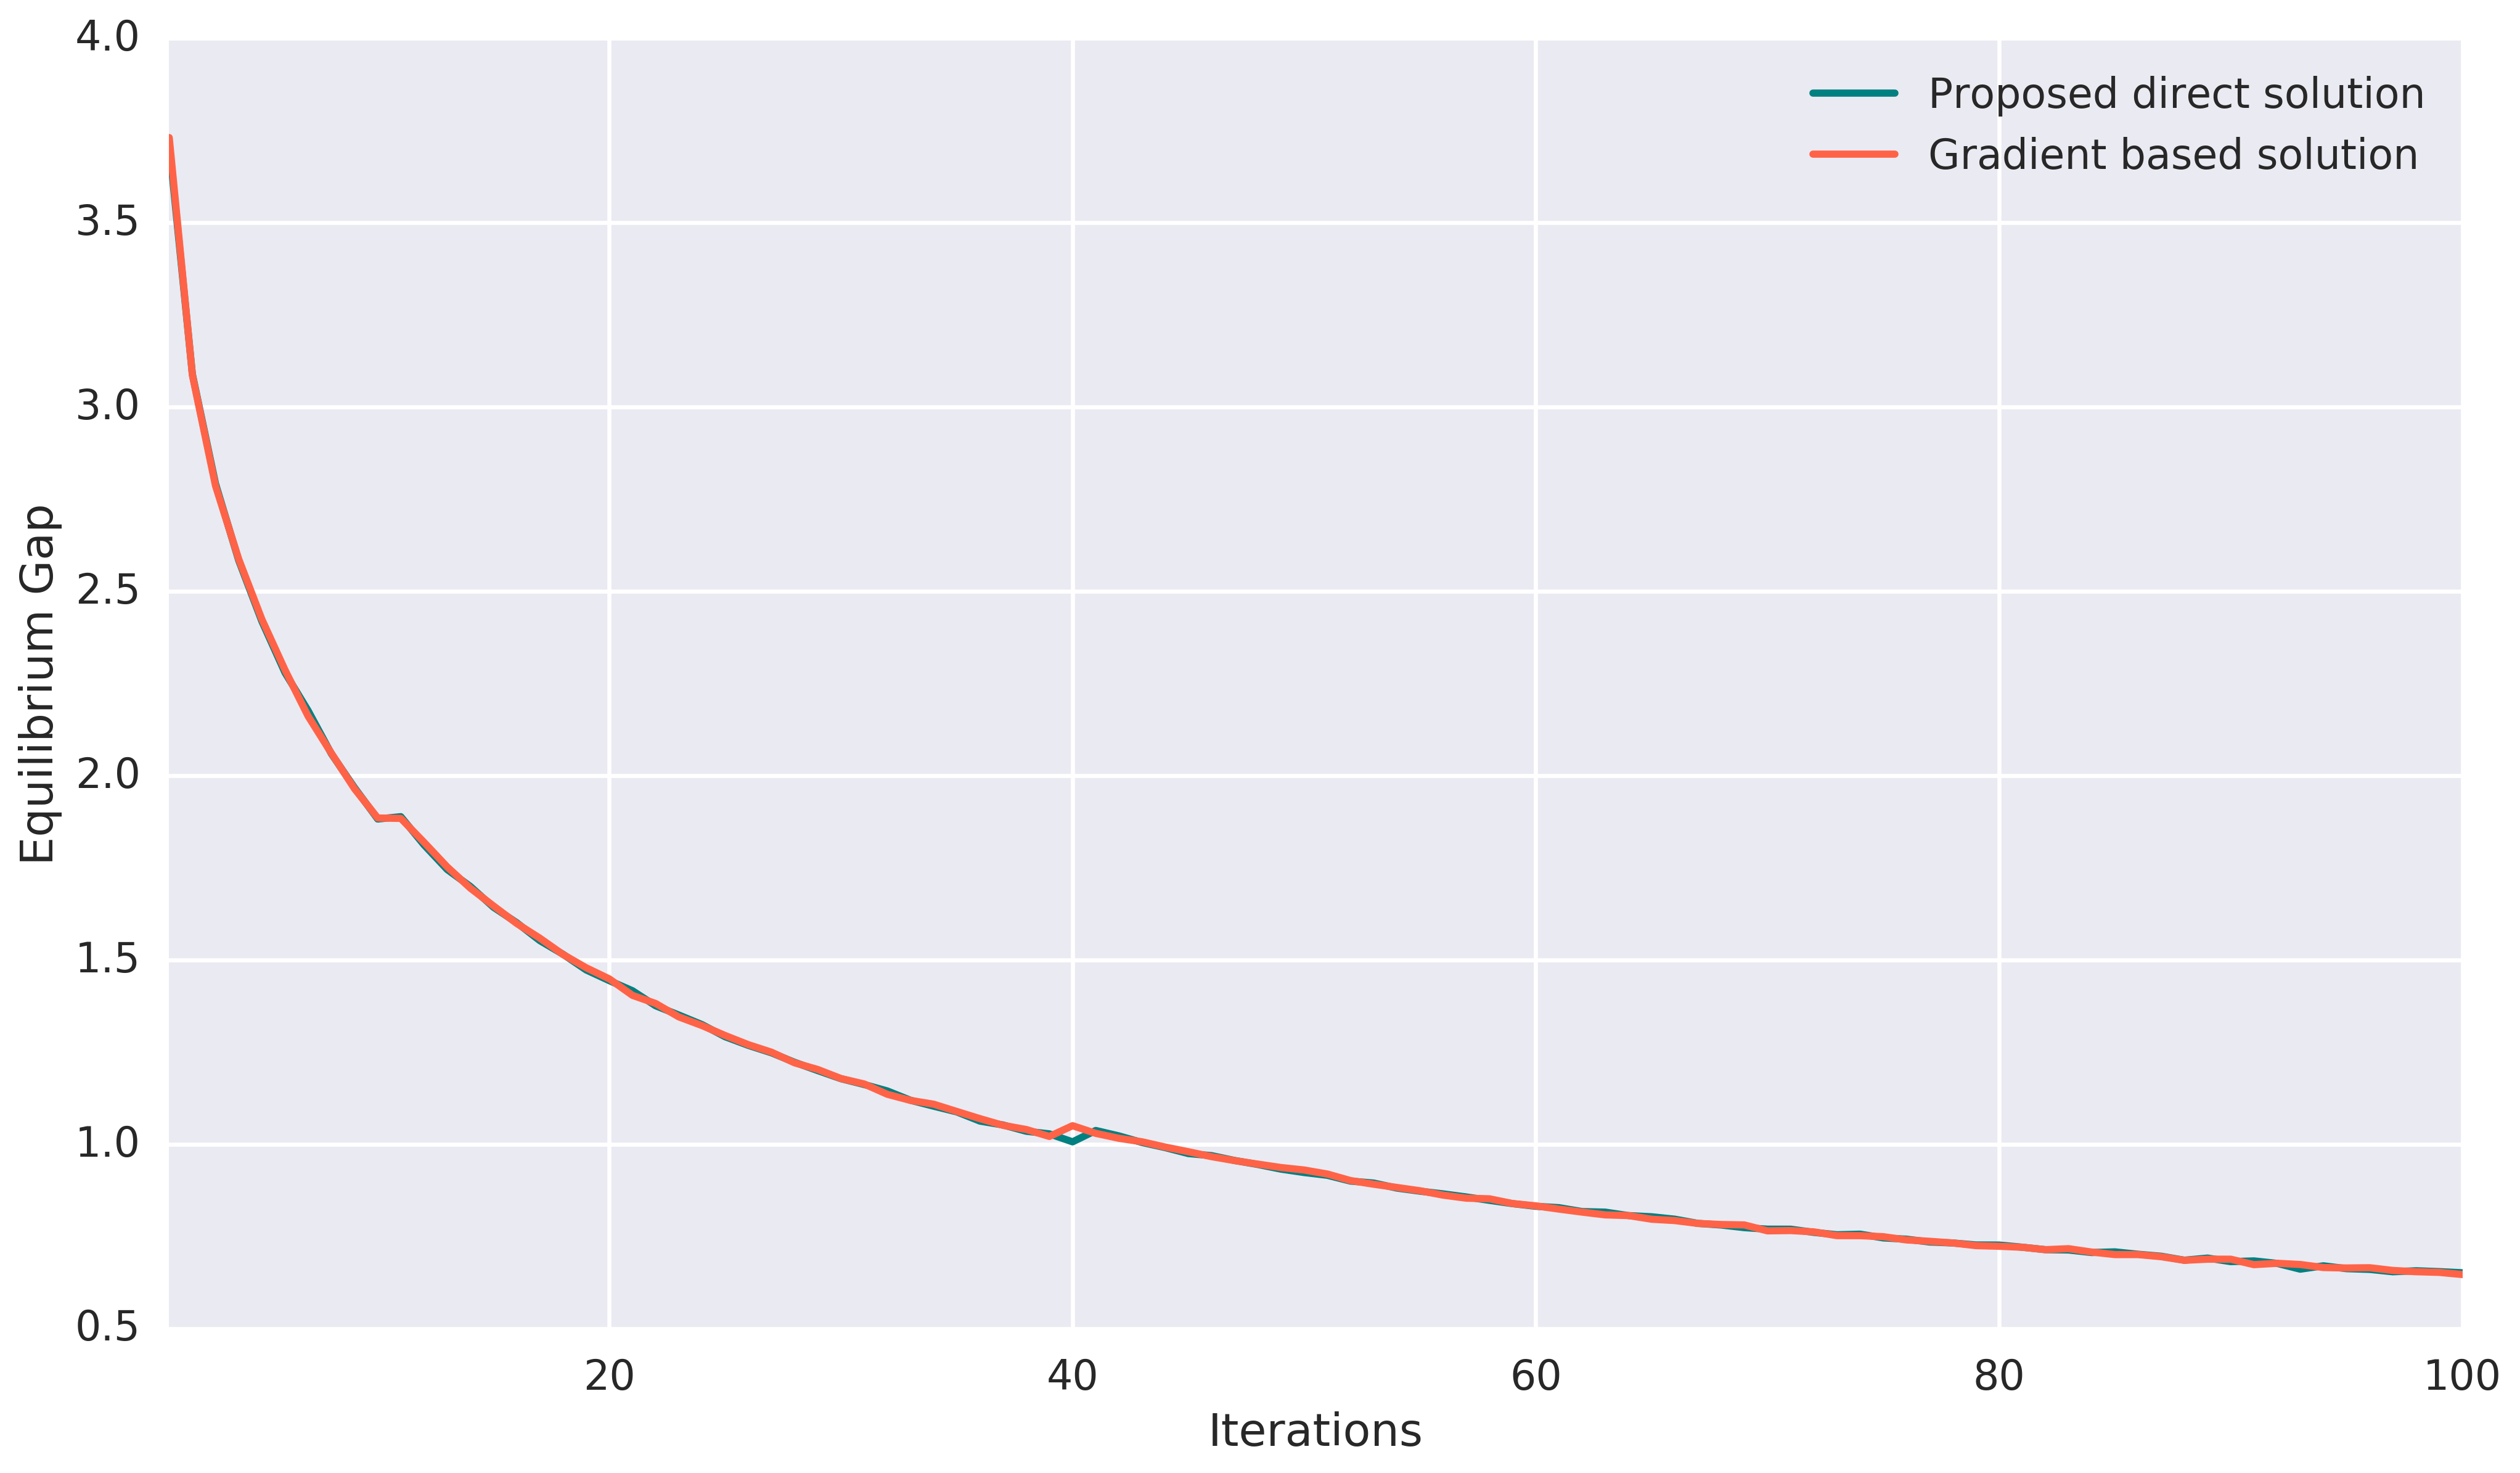

In [15]:
plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(gap_rec1)) + 1, gap_rec1, label = "Proposed direct solution", color = 'teal')
plt.plot(np.arange(len(gap_rec1)) + 1, gap_rec2, label = "Gradient based solution", color = 'tomato')
plt.ylabel("Equilibrium Gap")
plt.xlabel("Iterations")
plt.legend()
plt.xlim([1, 100])
plt.show()

## Profile

In [170]:
path_matrix, gap_rec1 = pickle.load(open('MSAbasic_result.pickle', 'rb'))

In [171]:
path_des_list = ['Drive:Solo:Path 1', 'Drive:Solo:Path 2', 'Drive:Carpool:Path 3',
                "Transit:Railway:Path 4", 'PnR:P3:Path 5', 'PnR:P3:Path 6',
                'PnR:P2:Path 7', 'PnR:P2:Path 8',
                'Drive:Solo:Path 9', 'Drive:Solo:Path 10', 'Drive:Carpool:Path 11', 'Transit:Bus:Path 12', 
                 'PnR:P3:Path 13',
                'Drive:Solo:Path 14', 'Drive:Solo:Path 15', 'Drive:Carpool:Path 16', 'PnR:P2:Path 17']

In [172]:
time_basis = datetime.datetime(2014, 1, 1, 5, 0)
time_incre = datetime.timedelta(minutes = 15)
x_axis = [(time_basis + i * time_incre) for i in xrange(16)]

In [173]:
OD_list = list()
for O in demand_dict.keys():
    for D in demand_dict[O].keys():
        OD_list.append((O,D))

In [174]:
OD_list

[(1, 1), (3, 1), (4, 1)]

In [184]:
colors_ = list(six.iteritems(colors.cnames))
# Transform to hex color values.
color_list = ['teal', 'tomato', 'blue', 'sienna', 'plum', 'red', 'yellowgreen', 'khaki']
marker_list = ["o", "v", "^", "<", ">", "p", "D","*","s", "D", "p"]

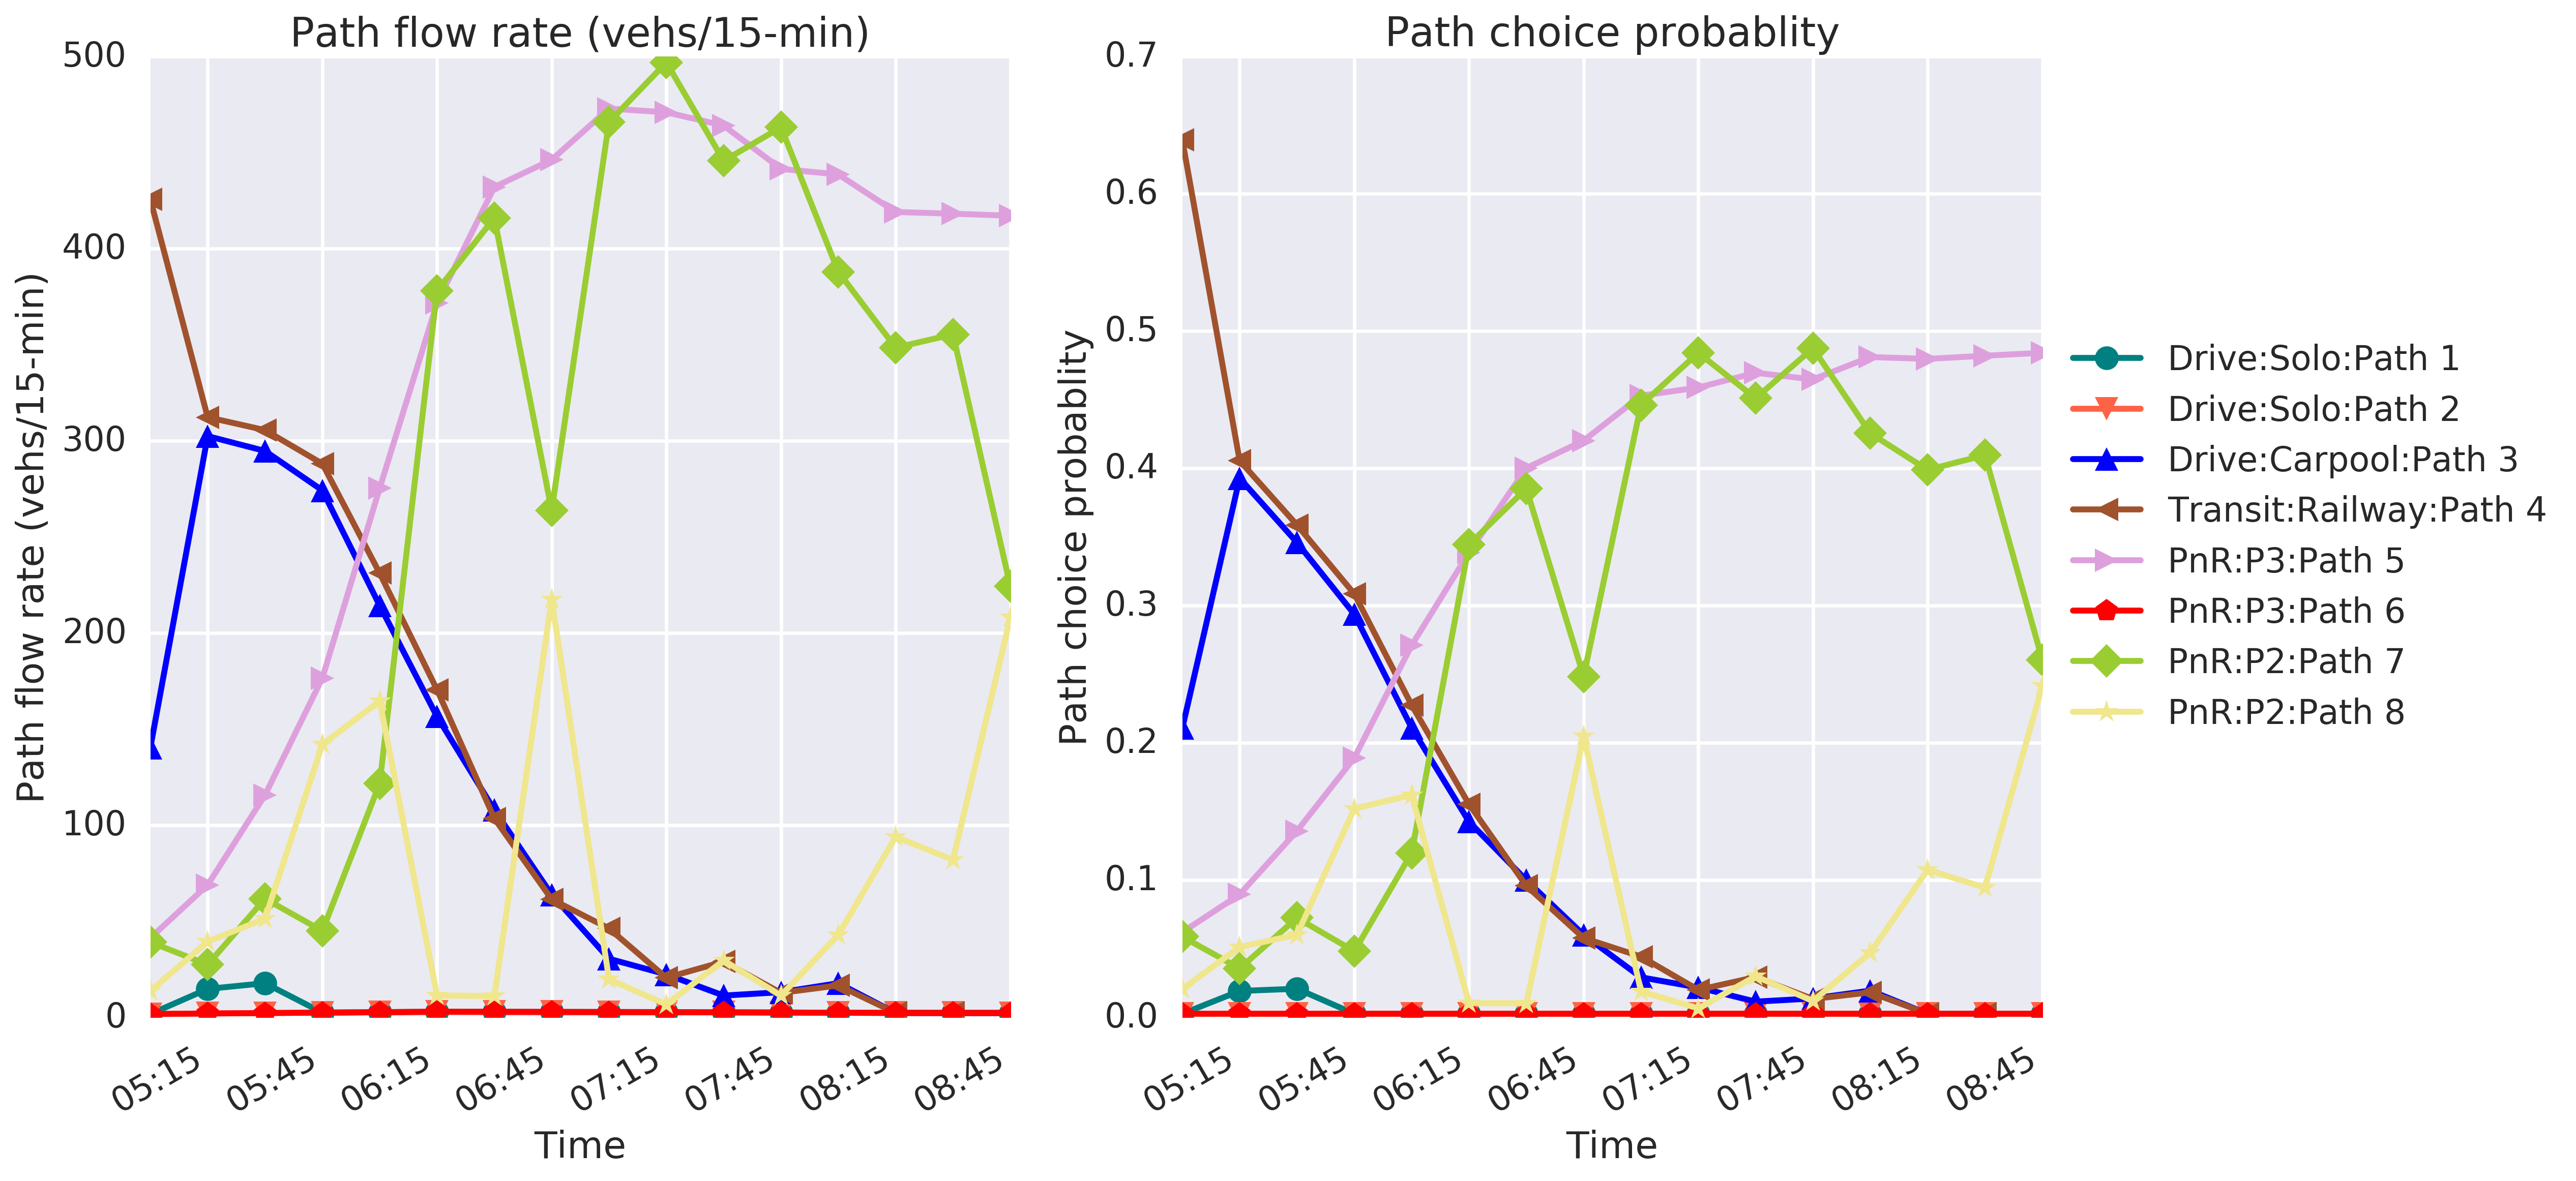

In [185]:
fig, axes = plt.subplots(1,2, sharex=True,  figsize=(16, 9), dpi=300)
for i, (O, D) in enumerate(OD_list[:1]):
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    for j, idx in enumerate(tmp_path_idx_list):
        axes[0].plot(x_axis, path_matrix[idx, :], label = idx, color = color_list[j], marker = marker_list[j])
        axes[1].plot(x_axis, path_matrix[idx, :] / path_matrix[tmp_path_idx_list, :].sum(axis = 0), 
                     label = path_des_list[idx], color = color_list[j], marker = marker_list[j])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_title('Path flow rate (vehs/15-min)')
    axes[1].set_title('Path choice probablity')
    axes[0].set_ylabel('Path flow rate (vehs/15-min)')
    axes[0].set_xlabel('Time')
    axes[1].set_ylabel('Path choice probablity')
    axes[1].set_xlabel('Time')
    axes[0].set_xlim(x_axis[0], x_axis[-1])
    axes[1].set_xlim(x_axis[0], x_axis[-1])
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
plt.show()

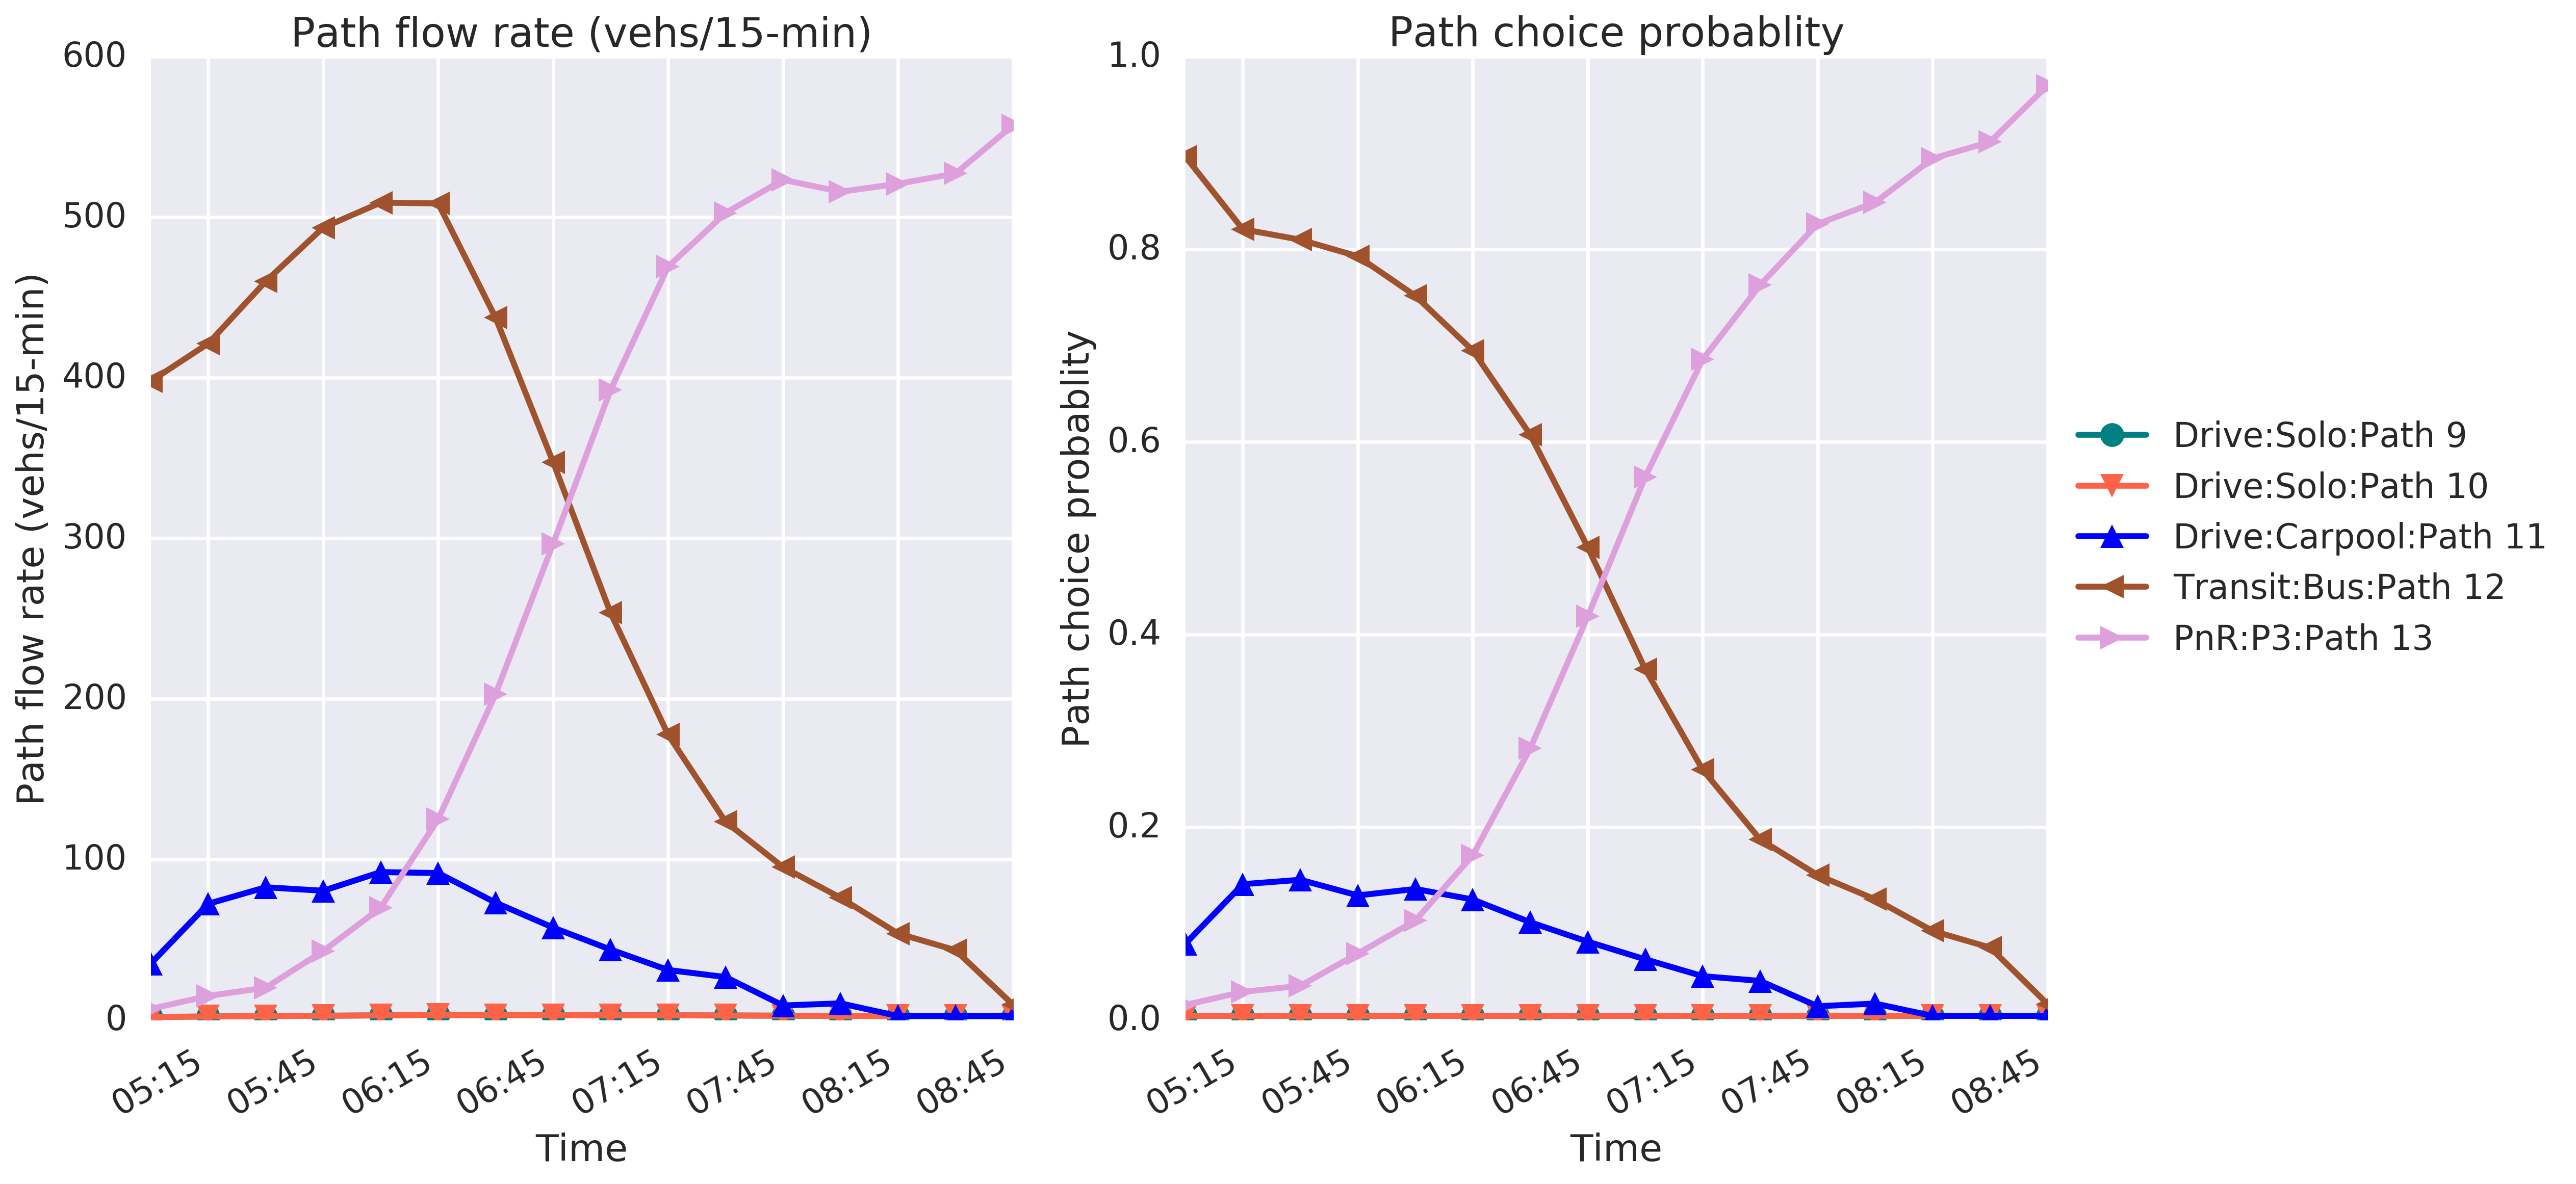

In [186]:
fig, axes = plt.subplots(1,2, sharex=True,  figsize=(16, 9), dpi=300)
for i, (O, D) in enumerate(OD_list[1:2]):
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    for j, idx in enumerate(tmp_path_idx_list):
        axes[0].plot(x_axis, path_matrix[idx, :], label = idx, color = color_list[j], marker = marker_list[j])
        axes[1].plot(x_axis, path_matrix[idx, :] / path_matrix[tmp_path_idx_list, :].sum(axis = 0), 
                     label = path_des_list[idx], color = color_list[j], marker = marker_list[j])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_title('Path flow rate (vehs/15-min)')
    axes[1].set_title('Path choice probablity')
    axes[0].set_ylabel('Path flow rate (vehs/15-min)')
    axes[0].set_xlabel('Time')
    axes[1].set_ylabel('Path choice probablity')
    axes[1].set_xlabel('Time')
    axes[0].set_xlim(x_axis[0], x_axis[-1])
    axes[1].set_xlim(x_axis[0], x_axis[-1])
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
plt.show()

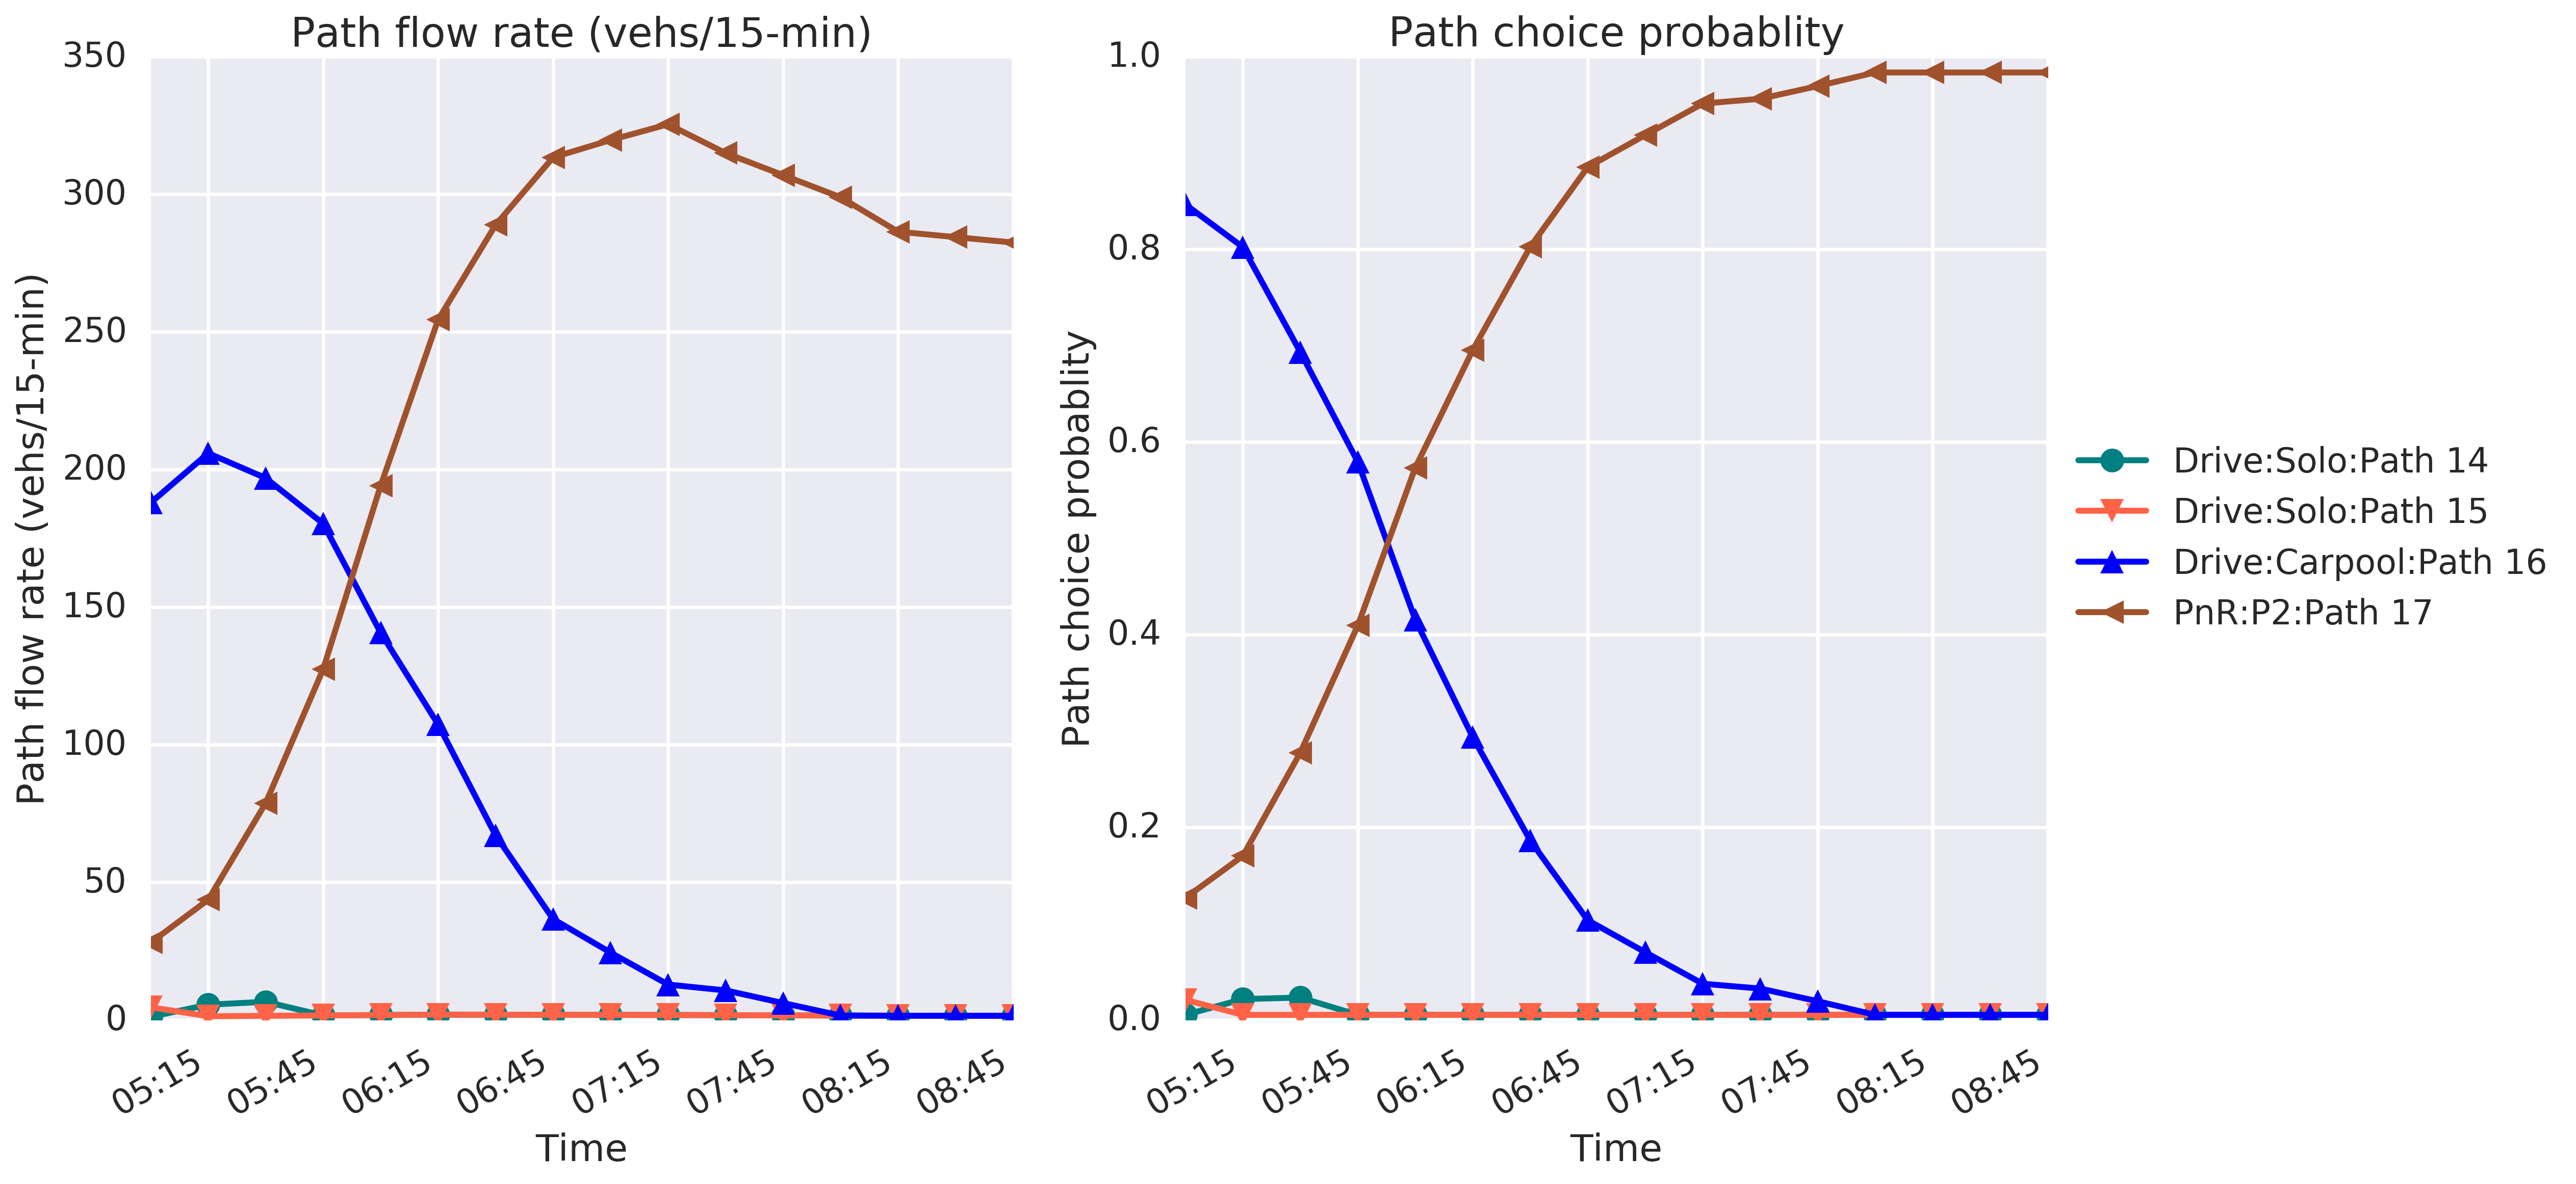

In [187]:
fig, axes = plt.subplots(1,2, sharex=True,  figsize=(16, 9), dpi=300)
for i, (O, D) in enumerate(OD_list[2:3]):
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    for j, idx in enumerate(tmp_path_idx_list):
        axes[0].plot(x_axis, path_matrix[idx, :], label = idx, color = color_list[j], marker = marker_list[j])
        axes[1].plot(x_axis, path_matrix[idx, :] / path_matrix[tmp_path_idx_list, :].sum(axis = 0), 
                     label = path_des_list[idx], color = color_list[j], marker = marker_list[j])
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_title('Path flow rate (vehs/15-min)')
    axes[1].set_title('Path choice probablity')
    axes[0].set_ylabel('Path flow rate (vehs/15-min)')
    axes[0].set_xlabel('Time')
    axes[1].set_ylabel('Path choice probablity')
    axes[1].set_xlabel('Time')
    axes[0].set_xlim(x_axis[0], x_axis[-1])
    axes[1].set_xlim(x_axis[0], x_axis[-1])
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
plt.show()

## Snesitivity

### DEMAND

In [188]:
demand_level = range(75, 130, 5)

In [189]:
record_list = list()
for demand in demand_level:
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = pickle.load(open("MSAdmd" + str(demand) + '.pickle', 'rb'))
    record_list.append([path_matrix, Lambda_matrix, cost_matrix, gap_record])

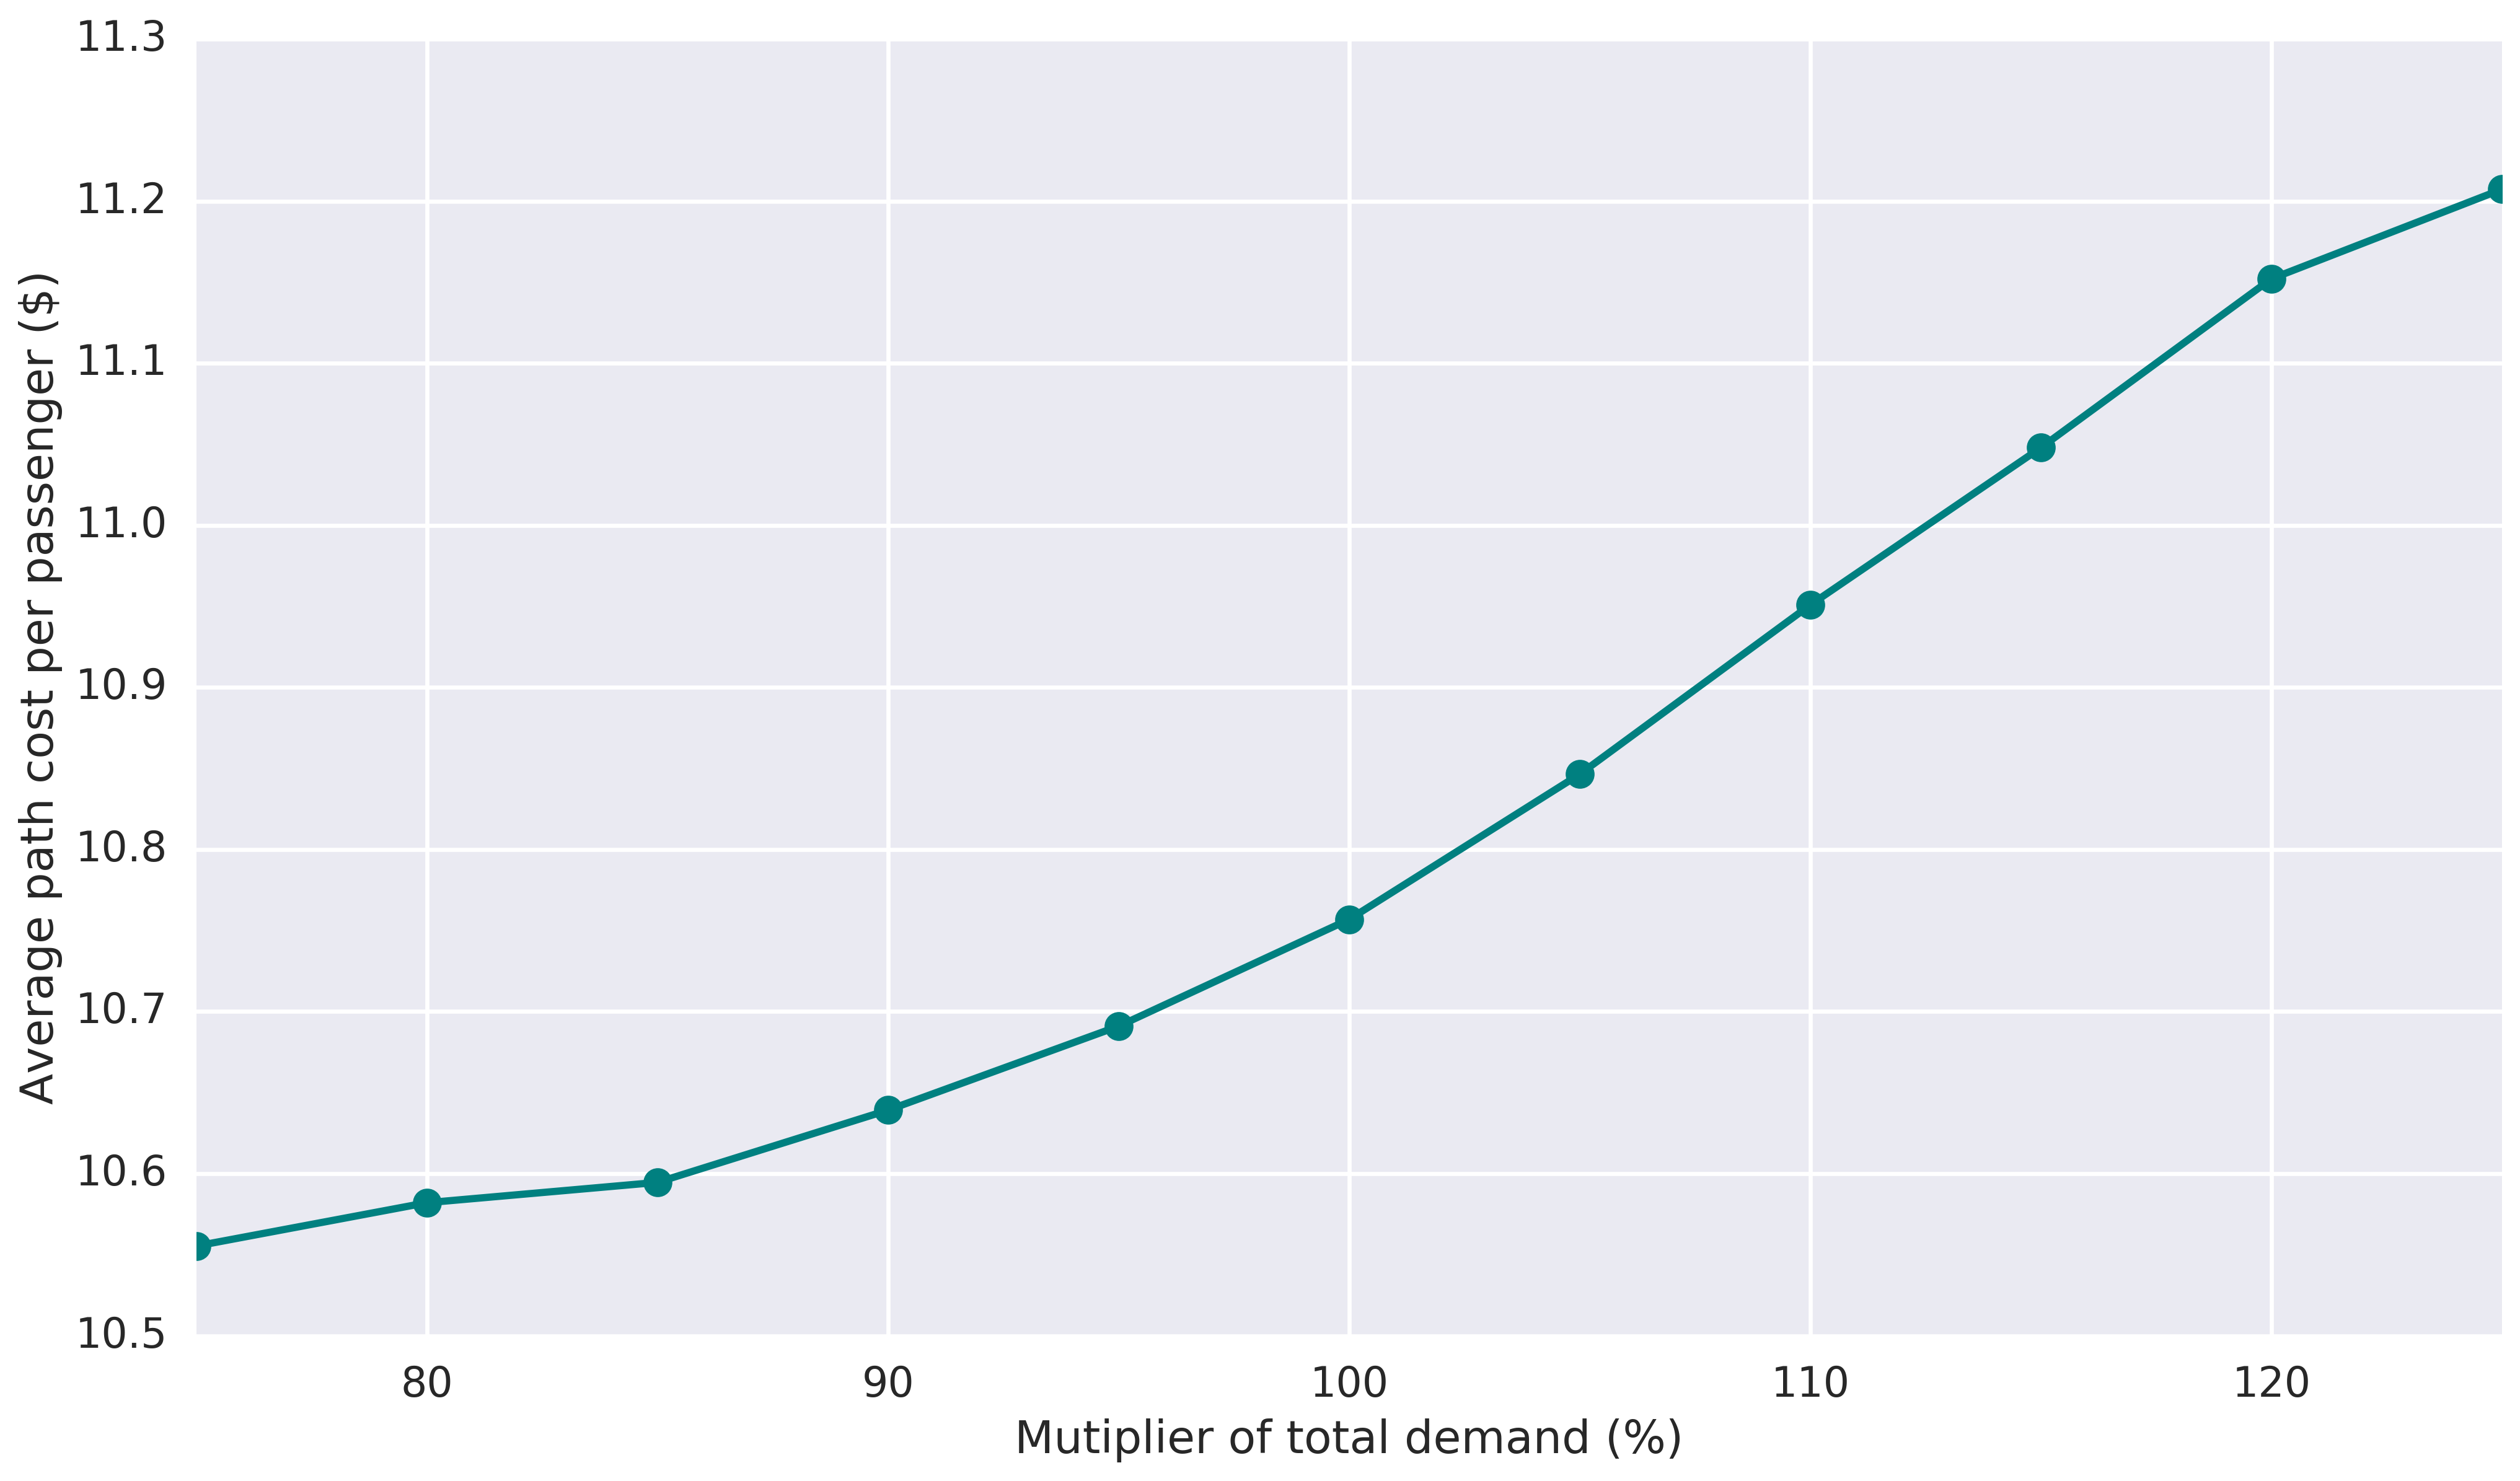

In [190]:
plt.figure(num=None, figsize=(16, 9), dpi=300, facecolor='w', edgecolor='k')
ave_cost_list = list()
for i in range(len(record_list)):
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = record_list[i]
    ave_cost_list.append(np.sum(cost_matrix * path_matrix) / np.sum(path_matrix))
plt.plot(demand_level, ave_cost_list, color = 'teal', marker = "o")
plt.ylabel('Average path cost per passenger ($)')
plt.xlabel('Mutiplier of total demand (%)')
plt.xlim([demand_level[0], demand_level[-1]])
plt.show()

In [191]:
res_df = pd.DataFrame(index = demand_level, columns = path_des_list)
for i, demand in enumerate(demand_level):
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = record_list[i]
    sum_path = path_matrix.sum(axis = 1)
    for j, path in enumerate(path_list):
        tmp_path_list = list(filter(lambda x: x.O == path.O and x.D == path.D, path_list))
        tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
        res_df.iloc[i, j] = sum_path[j] / np.sum(sum_path[tmp_path_idx_list])

In [192]:
res_df.head()

Drive:Solo:Path 1 Drive:Solo:Path 2 Drive:Carpool:Path 3  \
75        0.00460568         0.0027168             0.111596   
80        0.00460568         0.0027168             0.112597   
85        0.00460568         0.0027168             0.111271   
90        0.00459228         0.0027168             0.112721   
95        0.00460568         0.0027168             0.112767   

   Transit:Railway:Path 4 PnR:P3:Path 5 PnR:P3:Path 6 PnR:P2:Path 7  \
75               0.135271      0.363677     0.0027168      0.252523   
80                0.13506      0.361753     0.0027168      0.271614   
85               0.133913      0.361747     0.0027168      0.300689   
90               0.134945      0.361821     0.0027168      0.306524   
95                0.13459      0.362086     0.0027168      0.309191   

   PnR:P2:Path 8 Drive:Solo:Path 9 Drive:Solo:Path 10 Drive:Carpool:Path 11  \
75      0.126893        0.00434689         0.00434689             0.0735812   
80      0.108937        0.00434689         0.00434689             0.0731123   
85     0.0823406        0.00434689         0.00434689             0.0735567   
90      0.073963        0.00434689         0.00434689             0.0735479   
95     0.0713264        0.00434689         0.00434689             0.0721915   

   Transit:Bus:Path 12 PnR:P3:Path 13 Drive:Solo:Path 14 Drive:Solo:Path 15  \
75            0.424813       0.492912         0.00729315         0.00612556   
80            0.429154        0.48904         0.00729315         0.00612556   
85            0.433805       0.483944         0.00798511         0.00543361   
90            0.432038        0.48572         0.00798511         0.00543361   
95            0.436868       0.482246         0.00798511         0.00543361   

   Drive:Carpool:Path 16 PnR:P2:Path 17  
75              0.236517       0.750065  
80              0.236583       0.749998  
85              0.234865       0.751716  
90              0.236478       0.750103  
95              0.237428       0.749153

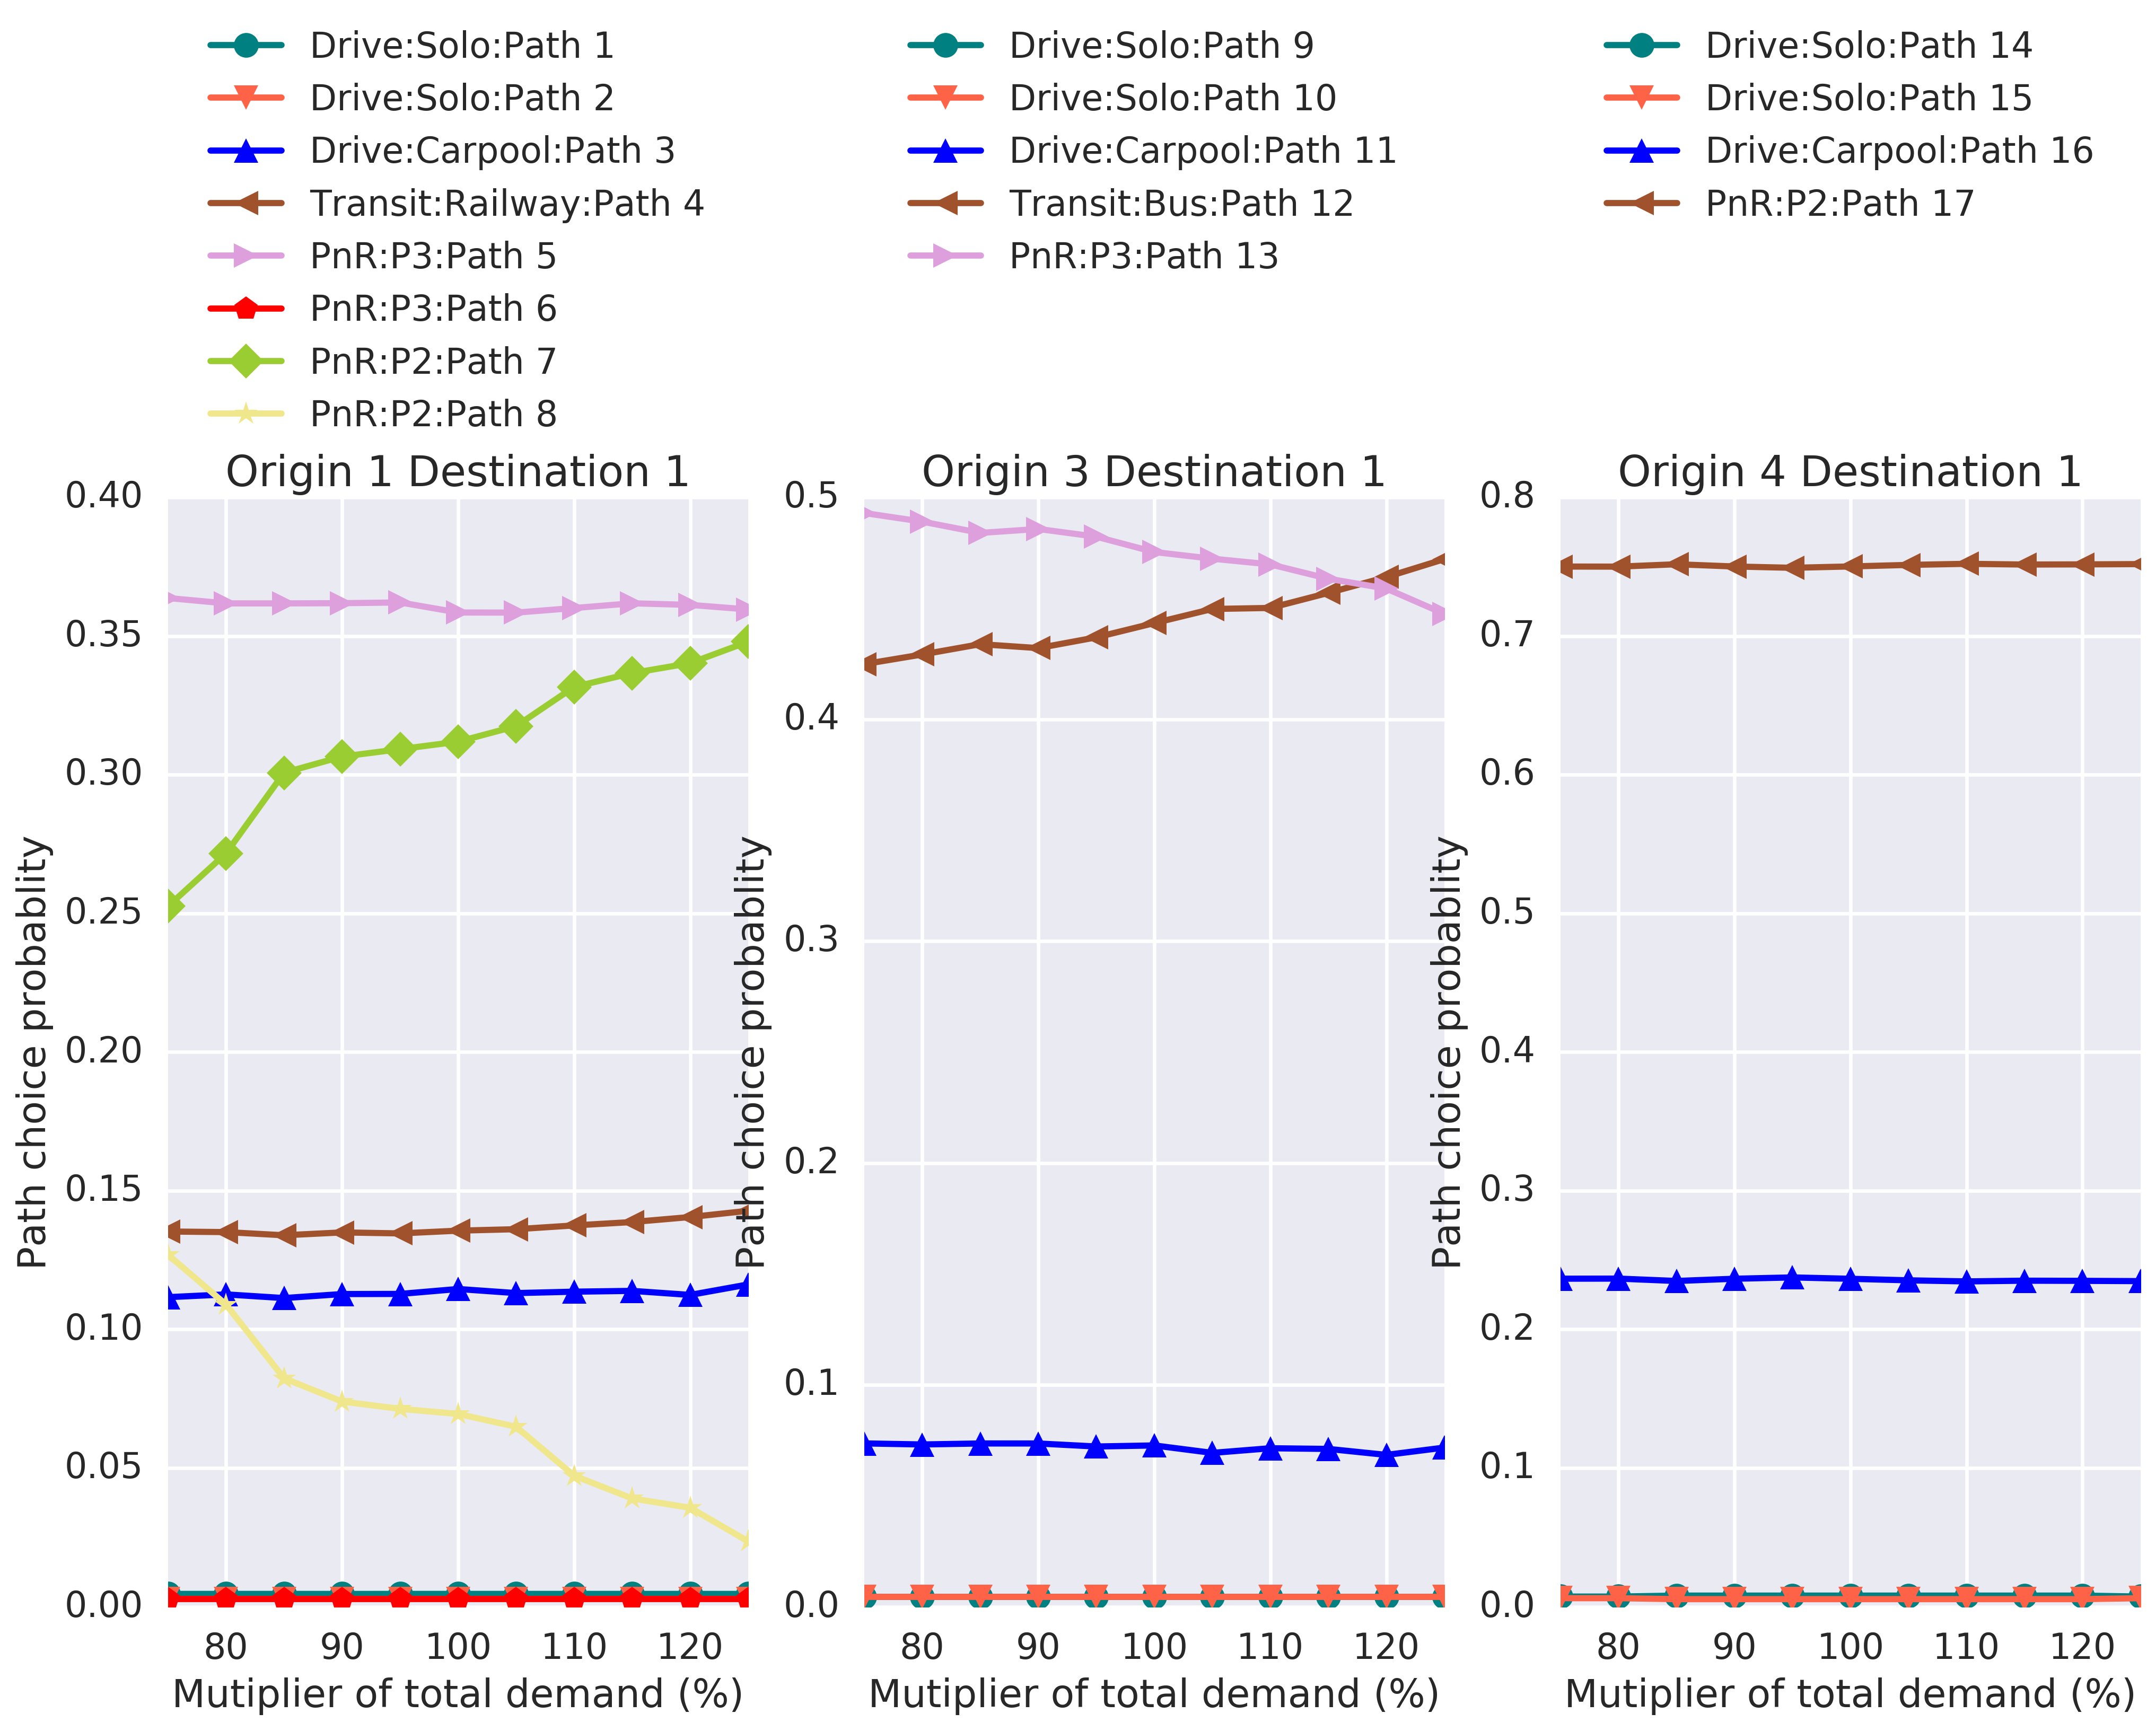

In [193]:
fig, axes = plt.subplots(1, 3, sharex=True,  figsize=(16, 9), dpi=300)
for i, (O, D) in enumerate(OD_list):
    axe = axes[i]
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    tmp_df = res_df.iloc[:, tmp_path_idx_list]
    for j in range(len(tmp_path_idx_list)):
        axe.plot(demand_level, tmp_df.iloc[:, j], label = path_des_list[tmp_path_idx_list[j]], 
                 color = color_list[j], marker = marker_list[j])
    axe.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=1, fancybox=True, shadow=True)
    axe.set_ylabel('Path choice probablity')
    axe.set_xlabel('Mutiplier of total demand (%)')
    axe.set_xlim(demand_level[0], demand_level[-1])
    axe.set_title('Origin ' + str(O) + ' Destination ' + str(D))
plt.show()

## park and bus

In [194]:
park_surge_list = range(1,6)
bus_surge_list = range(1,6)

In [195]:
pr_path_list = list(filter(lambda x: x.path_type == 'pnr', path_list))
pr_path_idx_list = list(map(lambda x: path_list.index(x), pr_path_list))
transit_path_list = list(filter(lambda x: x.path_type == 'metro' or x.path_type == 'transit', path_list))
transit_path_idx_list = list(map(lambda x: path_list.index(x), transit_path_list))
drive_path_list = list(filter(lambda x: x.path_type == 'single_drive' or x.path_type == 'multiple_drive', path_list))
drive_path_idx_list = list(map(lambda x: path_list.index(x), drive_path_list))

In [196]:
res2_df = pd.DataFrame(index = park_surge_list, columns = bus_surge_list)
pr_df = pd.DataFrame(index = park_surge_list, columns = bus_surge_list)
transit_df = pd.DataFrame(index = park_surge_list, columns = bus_surge_list)
drive_df = pd.DataFrame(index = park_surge_list, columns = bus_surge_list)

for park in park_surge_list:
    for bus in bus_surge_list:
        [path_matrix, Lambda_matrix, cost_matrix, gap_record] = pickle.load(
            open("MSAbus" + str(bus) + 'park' + str(park) + '.pickle', 'rb'))
        res2_df.loc[park, bus] = np.sum(cost_matrix * path_matrix) / np.sum(path_matrix)
        pr_df.loc[park, bus] = np.sum(cost_matrix[pr_path_idx_list, :] * path_matrix[pr_path_idx_list, :]) / np.sum(path_matrix[pr_path_idx_list,:])
        transit_df.loc[park, bus] = np.sum(cost_matrix[transit_path_idx_list, :] * path_matrix[transit_path_idx_list, :]) / np.sum(path_matrix[transit_path_idx_list,:])
        drive_df.loc[park, bus] = np.sum(cost_matrix[drive_path_idx_list, :] * path_matrix[drive_path_idx_list, :]) / np.sum(path_matrix[drive_path_idx_list,:])

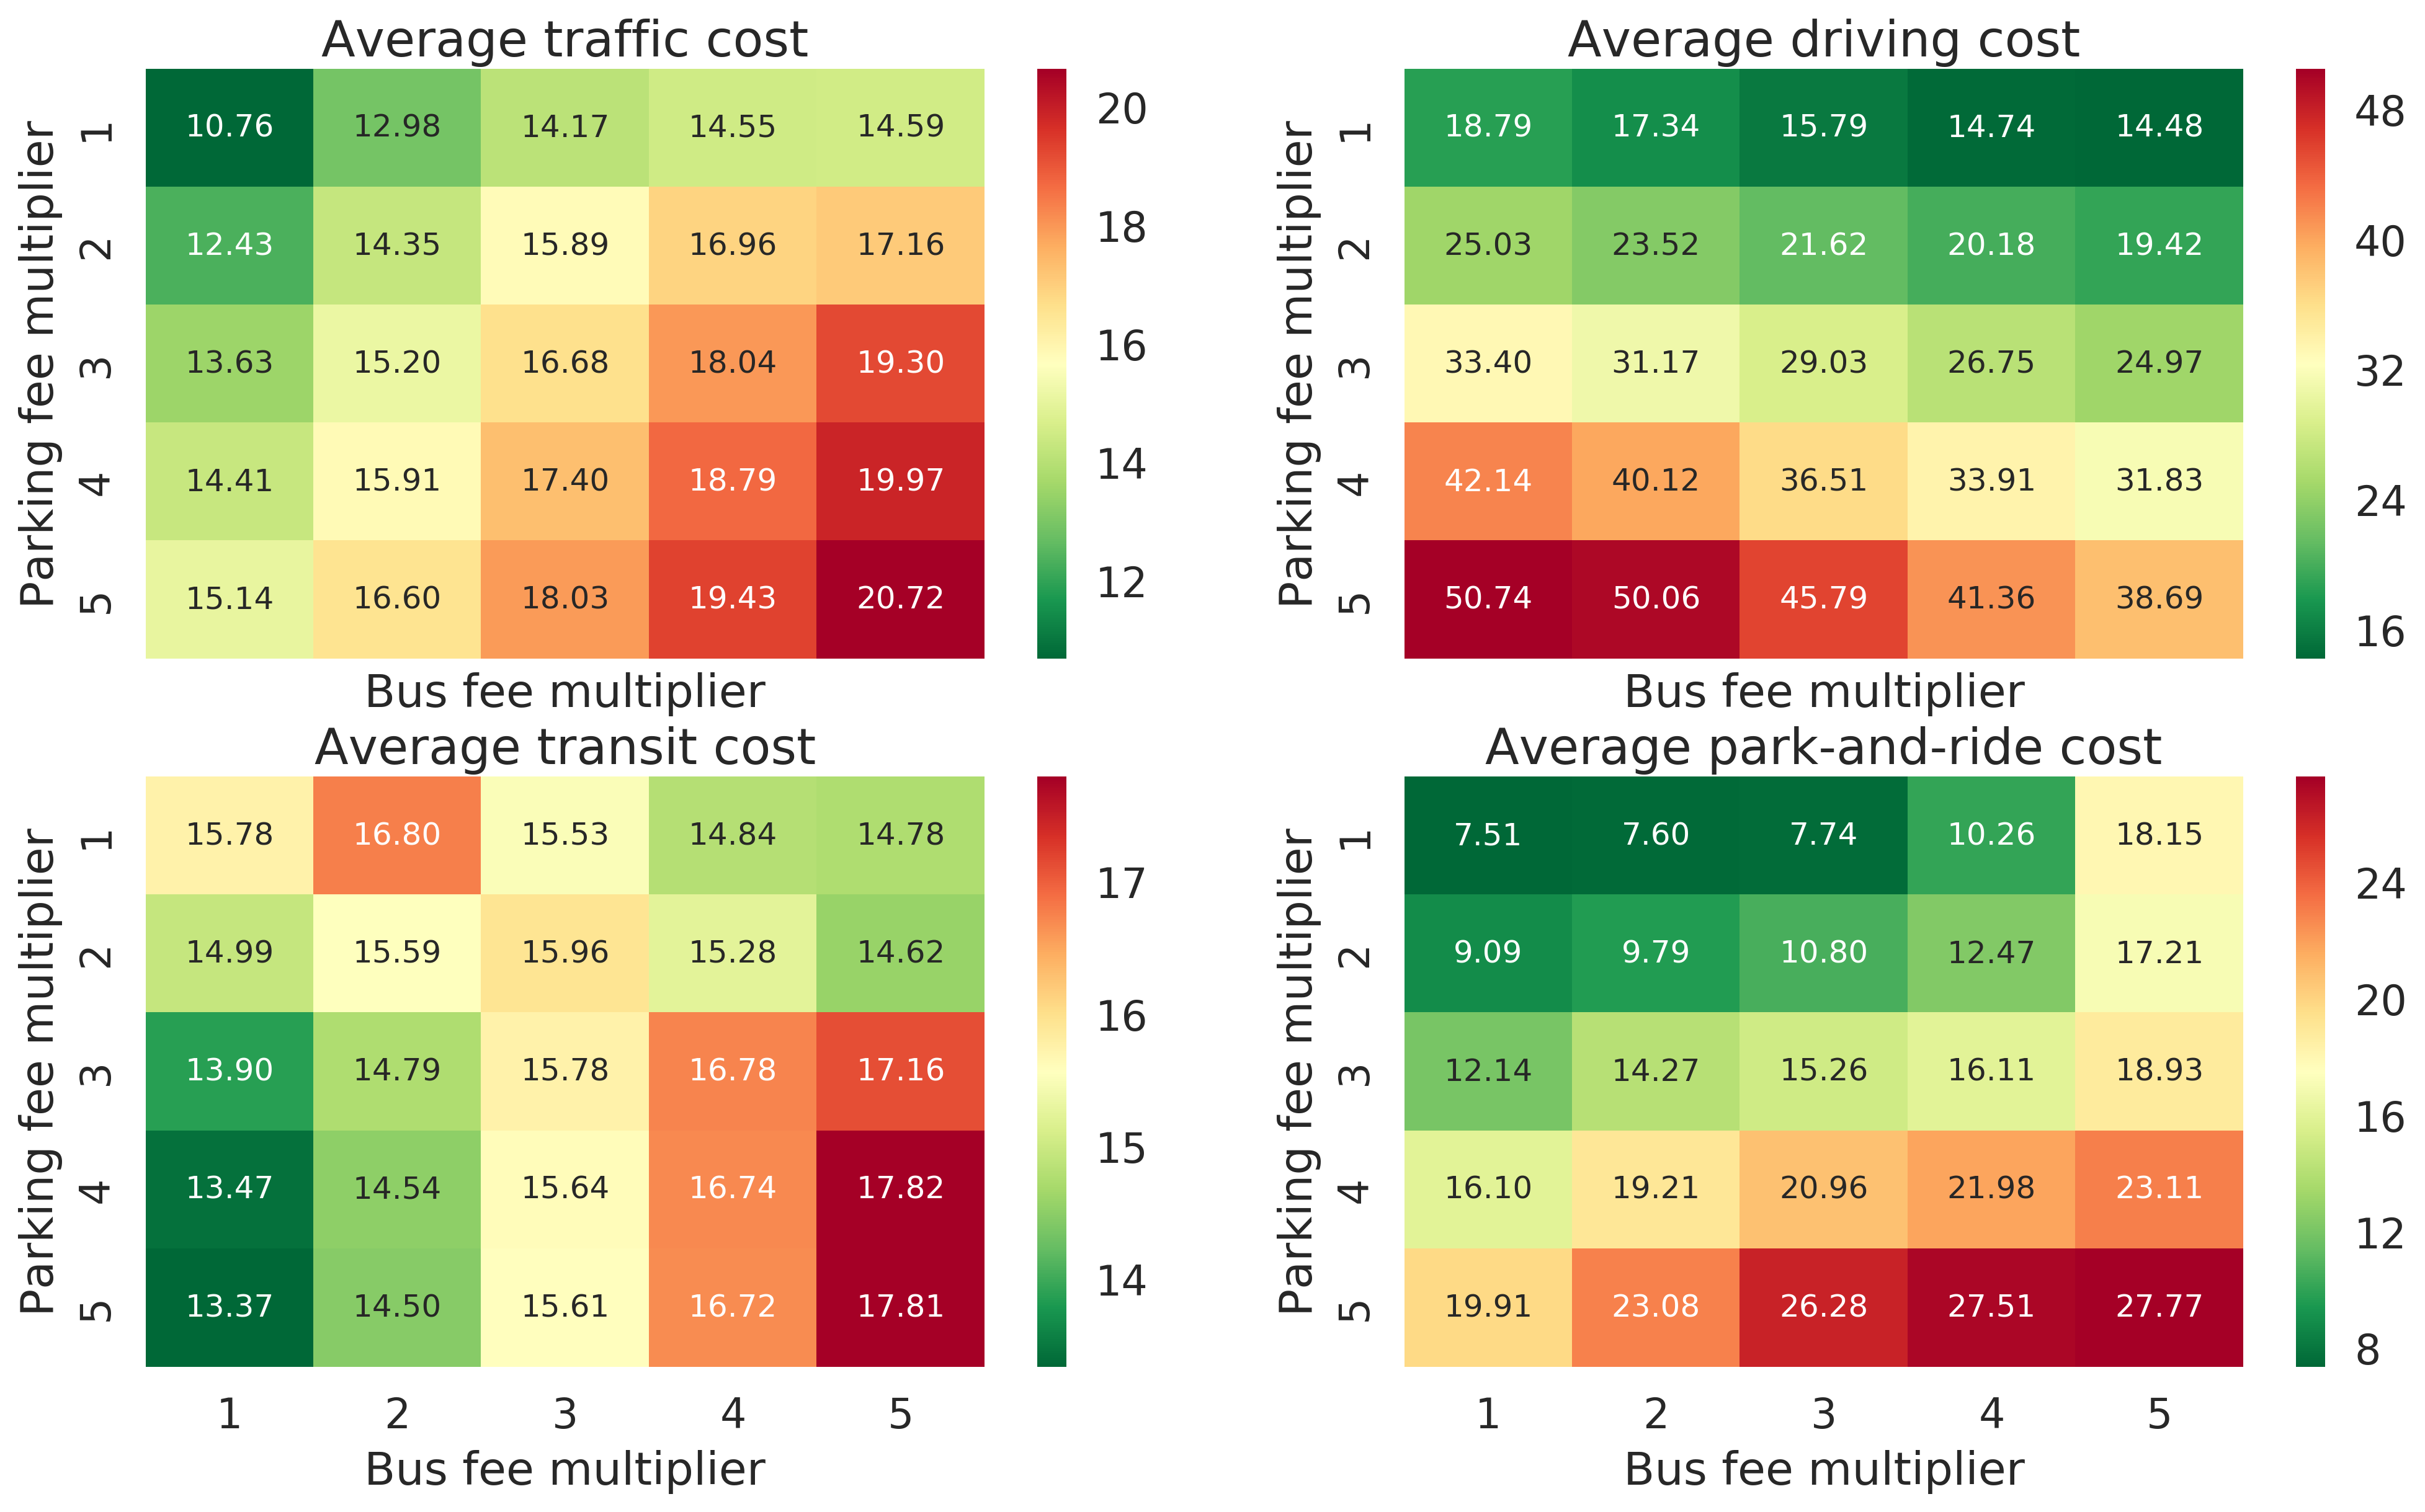

In [197]:
title_list = ['Average traffic cost', 'Average driving cost', 'Average transit cost', 'Average park-and-ride cost']
fig, axes = plt.subplots(2, 2, sharex=True,  figsize=(16, 9), dpi=300)
sns.heatmap(np.round(res2_df.astype(np.float), 4), cmap='RdYlGn_r', annot=True, fmt='.2f', ax = axes[0,0])
sns.heatmap(np.round(drive_df.astype(np.float), 4), cmap='RdYlGn_r', annot=True, fmt='.2f', ax = axes[0,1])
sns.heatmap(np.round(transit_df.astype(np.float), 4), cmap='RdYlGn_r', annot=True, fmt='.2f', ax = axes[1,0])
sns.heatmap(np.round(pr_df.astype(np.float), 4), cmap='RdYlGn_r', annot=True, fmt='.2f', ax = axes[1,1])
axes = axes.flatten()
for i, axe in enumerate(axes):
    axe.set_ylabel('Parking fee multiplier')
    axe.set_xlabel('Bus fee multiplier')
    axe.set_title(title_list[i])
plt.show()

## Carpool 

In [198]:
cost_level = range(1, 6, 1)
record_list = list()
for cost in cost_level:
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = pickle.load(open("MSApool" + str(cost) + '.pickle', 'rb'))
    record_list.append([path_matrix, Lambda_matrix, cost_matrix, gap_record])

In [199]:
res_df = pd.DataFrame(index = cost_level, columns = path_des_list)
for i, cost in enumerate(cost_level):
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = record_list[i]
    sum_path = path_matrix.sum(axis = 1)
    for j, path in enumerate(path_list):
        tmp_path_list = list(filter(lambda x: x.O == path.O and x.D == path.D, path_list))
        tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
        res_df.iloc[i, j] = sum_path[j] / np.sum(sum_path[tmp_path_idx_list])

In [200]:
res_df

Drive:Solo:Path 1 Drive:Solo:Path 2 Drive:Carpool:Path 3  \
1        0.00460568         0.0027168             0.114538   
2        0.00537529         0.0027168            0.0562366   
3        0.00517482         0.0027168            0.0254552   
4        0.00507935         0.0027168            0.0142399   
5        0.00507935         0.0027168           0.00796079   

  Transit:Railway:Path 4 PnR:P3:Path 5 PnR:P3:Path 6 PnR:P2:Path 7  \
1               0.135576      0.358466     0.0027168      0.311884   
2               0.165155      0.372525     0.0027168      0.338017   
3               0.176553      0.384667     0.0027168      0.342542   
4               0.182183      0.390719     0.0027168      0.348537   
5               0.188189      0.391713     0.0027168      0.348234   

  PnR:P2:Path 8 Drive:Solo:Path 9 Drive:Solo:Path 10 Drive:Carpool:Path 11  \
1     0.0694964        0.00434689         0.00434689             0.0726669   
2     0.0572578        0.00434689         0.00434689              0.033618   
3     0.0601751        0.00434689         0.00434689             0.0163695   
4     0.0538082        0.00434689         0.00434689             0.0100654   
5     0.0533904        0.00434689         0.00434689            0.00434689   

  Transit:Bus:Path 12 PnR:P3:Path 13 Drive:Solo:Path 14 Drive:Solo:Path 15  \
1            0.443307       0.475332         0.00798511         0.00543361   
2            0.476471       0.481217          0.0102495         0.00543361   
3            0.486625       0.488311          0.0138653         0.00543361   
4            0.492944       0.488297          0.0162805         0.00543361   
5            0.498913       0.488047          0.0180897         0.00632154   

  Drive:Carpool:Path 16 PnR:P2:Path 17  
1              0.236448       0.750134  
2              0.147805       0.836512  
3             0.0831702       0.897531  
4             0.0426106       0.935675  
5              0.020249        0.95534

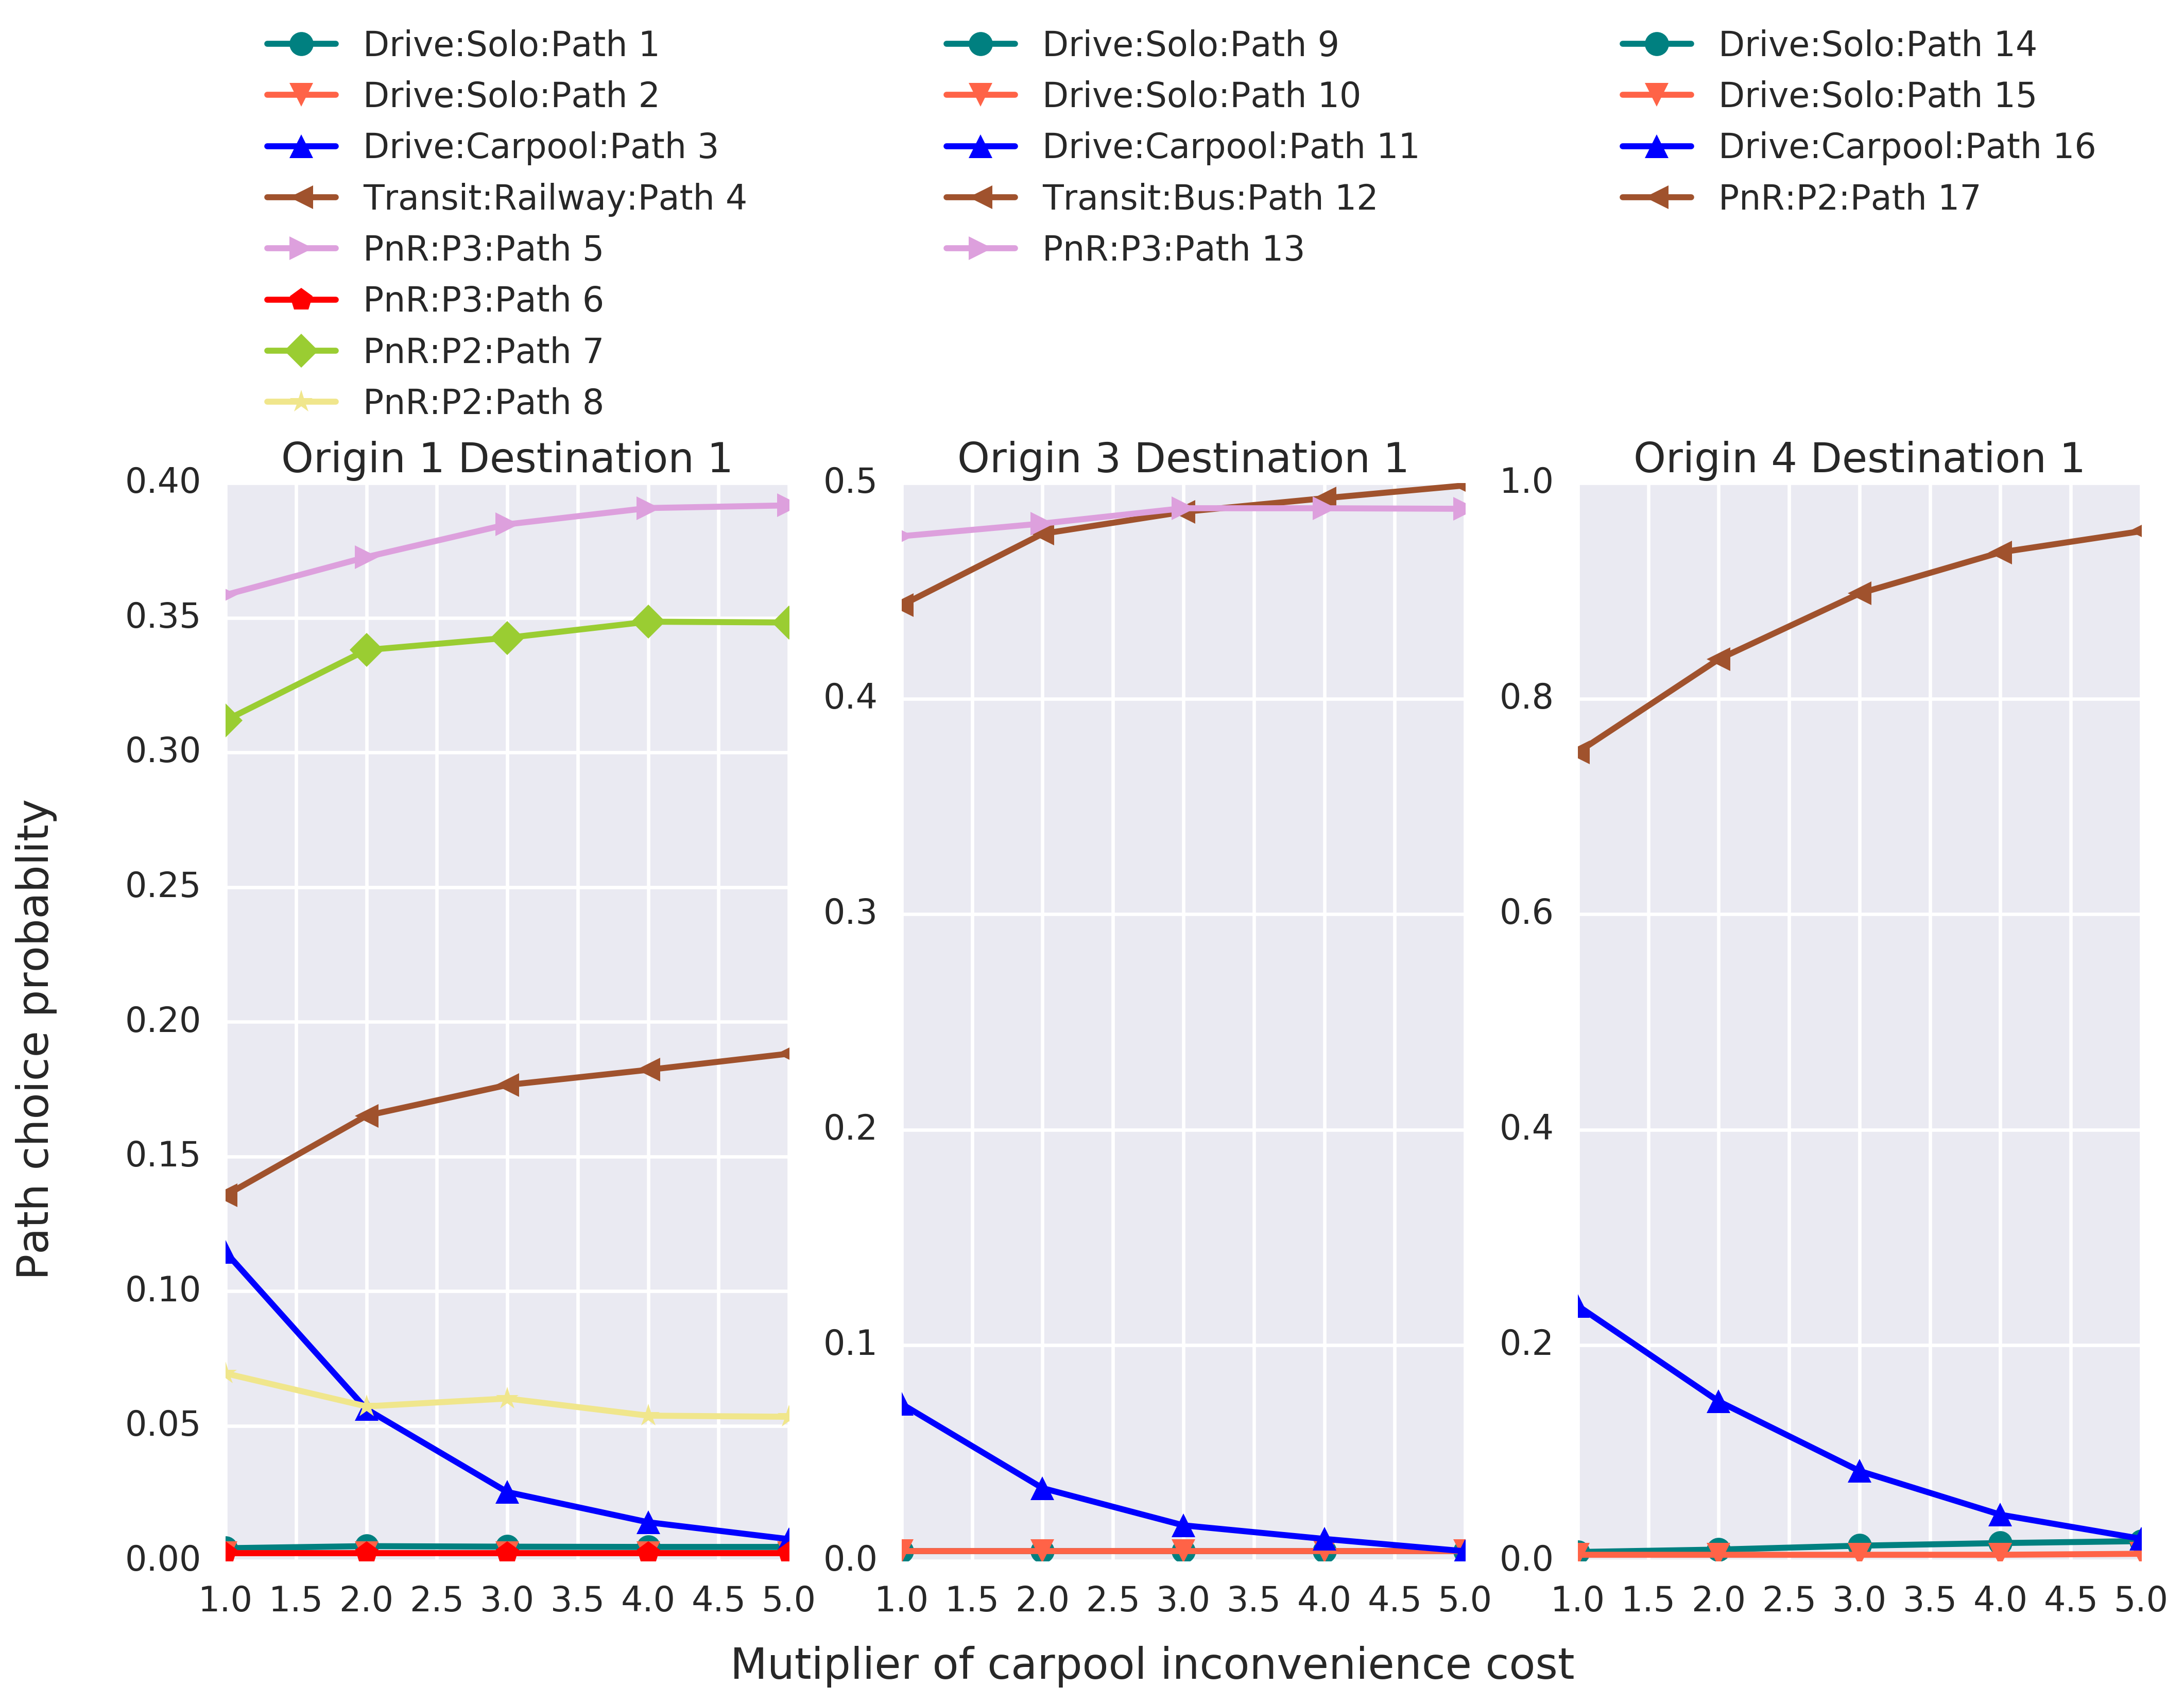

In [201]:
fig, axes = plt.subplots(1, 3, sharex=True,  figsize=(16, 9), dpi=300)
axes = axes.flatten()
for i, (O, D) in enumerate(OD_list):
    axe = axes[i]
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    tmp_df = res_df.iloc[:, tmp_path_idx_list]
    for j in range(len(tmp_path_idx_list)):
        axe.plot(cost_level, tmp_df.iloc[:, j], label = path_des_list[tmp_path_idx_list[j]], 
                 color = color_list[j], marker = marker_list[j])
    axe.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=1, fancybox=True, shadow=True)
#     axe.set_ylabel('Path choice probablity')
#     axe.set_xlabel('Mutiplier of carpool inconvenience cost')
    axe.set_xlim(cost_level[0], cost_level[-1])
    axe.set_title('Origin ' + str(O) + ' Destination ' + str(D))
# plt.ylabel('Path choice probablity')
# plt.xlabel('Mutiplier of carpool inconvenience cost')
fig.text(0.5, 0.04, 'Mutiplier of carpool inconvenience cost', ha='center', fontsize = 20)
fig.text(0.04, 0.5, 'Path choice probablity', va='center', rotation='vertical', fontsize = 20)
plt.show()

## Through

In [202]:
through_level = range(0, 100, 10)
record_list = list()
for through in through_level:
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = pickle.load(open("MSAthrough" + str(through) + '.pickle', 'rb'))
    record_list.append([path_matrix, Lambda_matrix, cost_matrix, gap_record])

In [203]:
res_df = pd.DataFrame(index = through_level, columns = path_des_list)
for i, through in enumerate(record_list):
    [path_matrix, Lambda_matrix, cost_matrix, gap_record] = record_list[i]
    sum_path = path_matrix.sum(axis = 1)
    for j, path in enumerate(path_list):
        tmp_path_list = list(filter(lambda x: x.O == path.O and x.D == path.D, path_list))
        tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
        res_df.iloc[i, j] = sum_path[j] / np.sum(sum_path[tmp_path_idx_list])

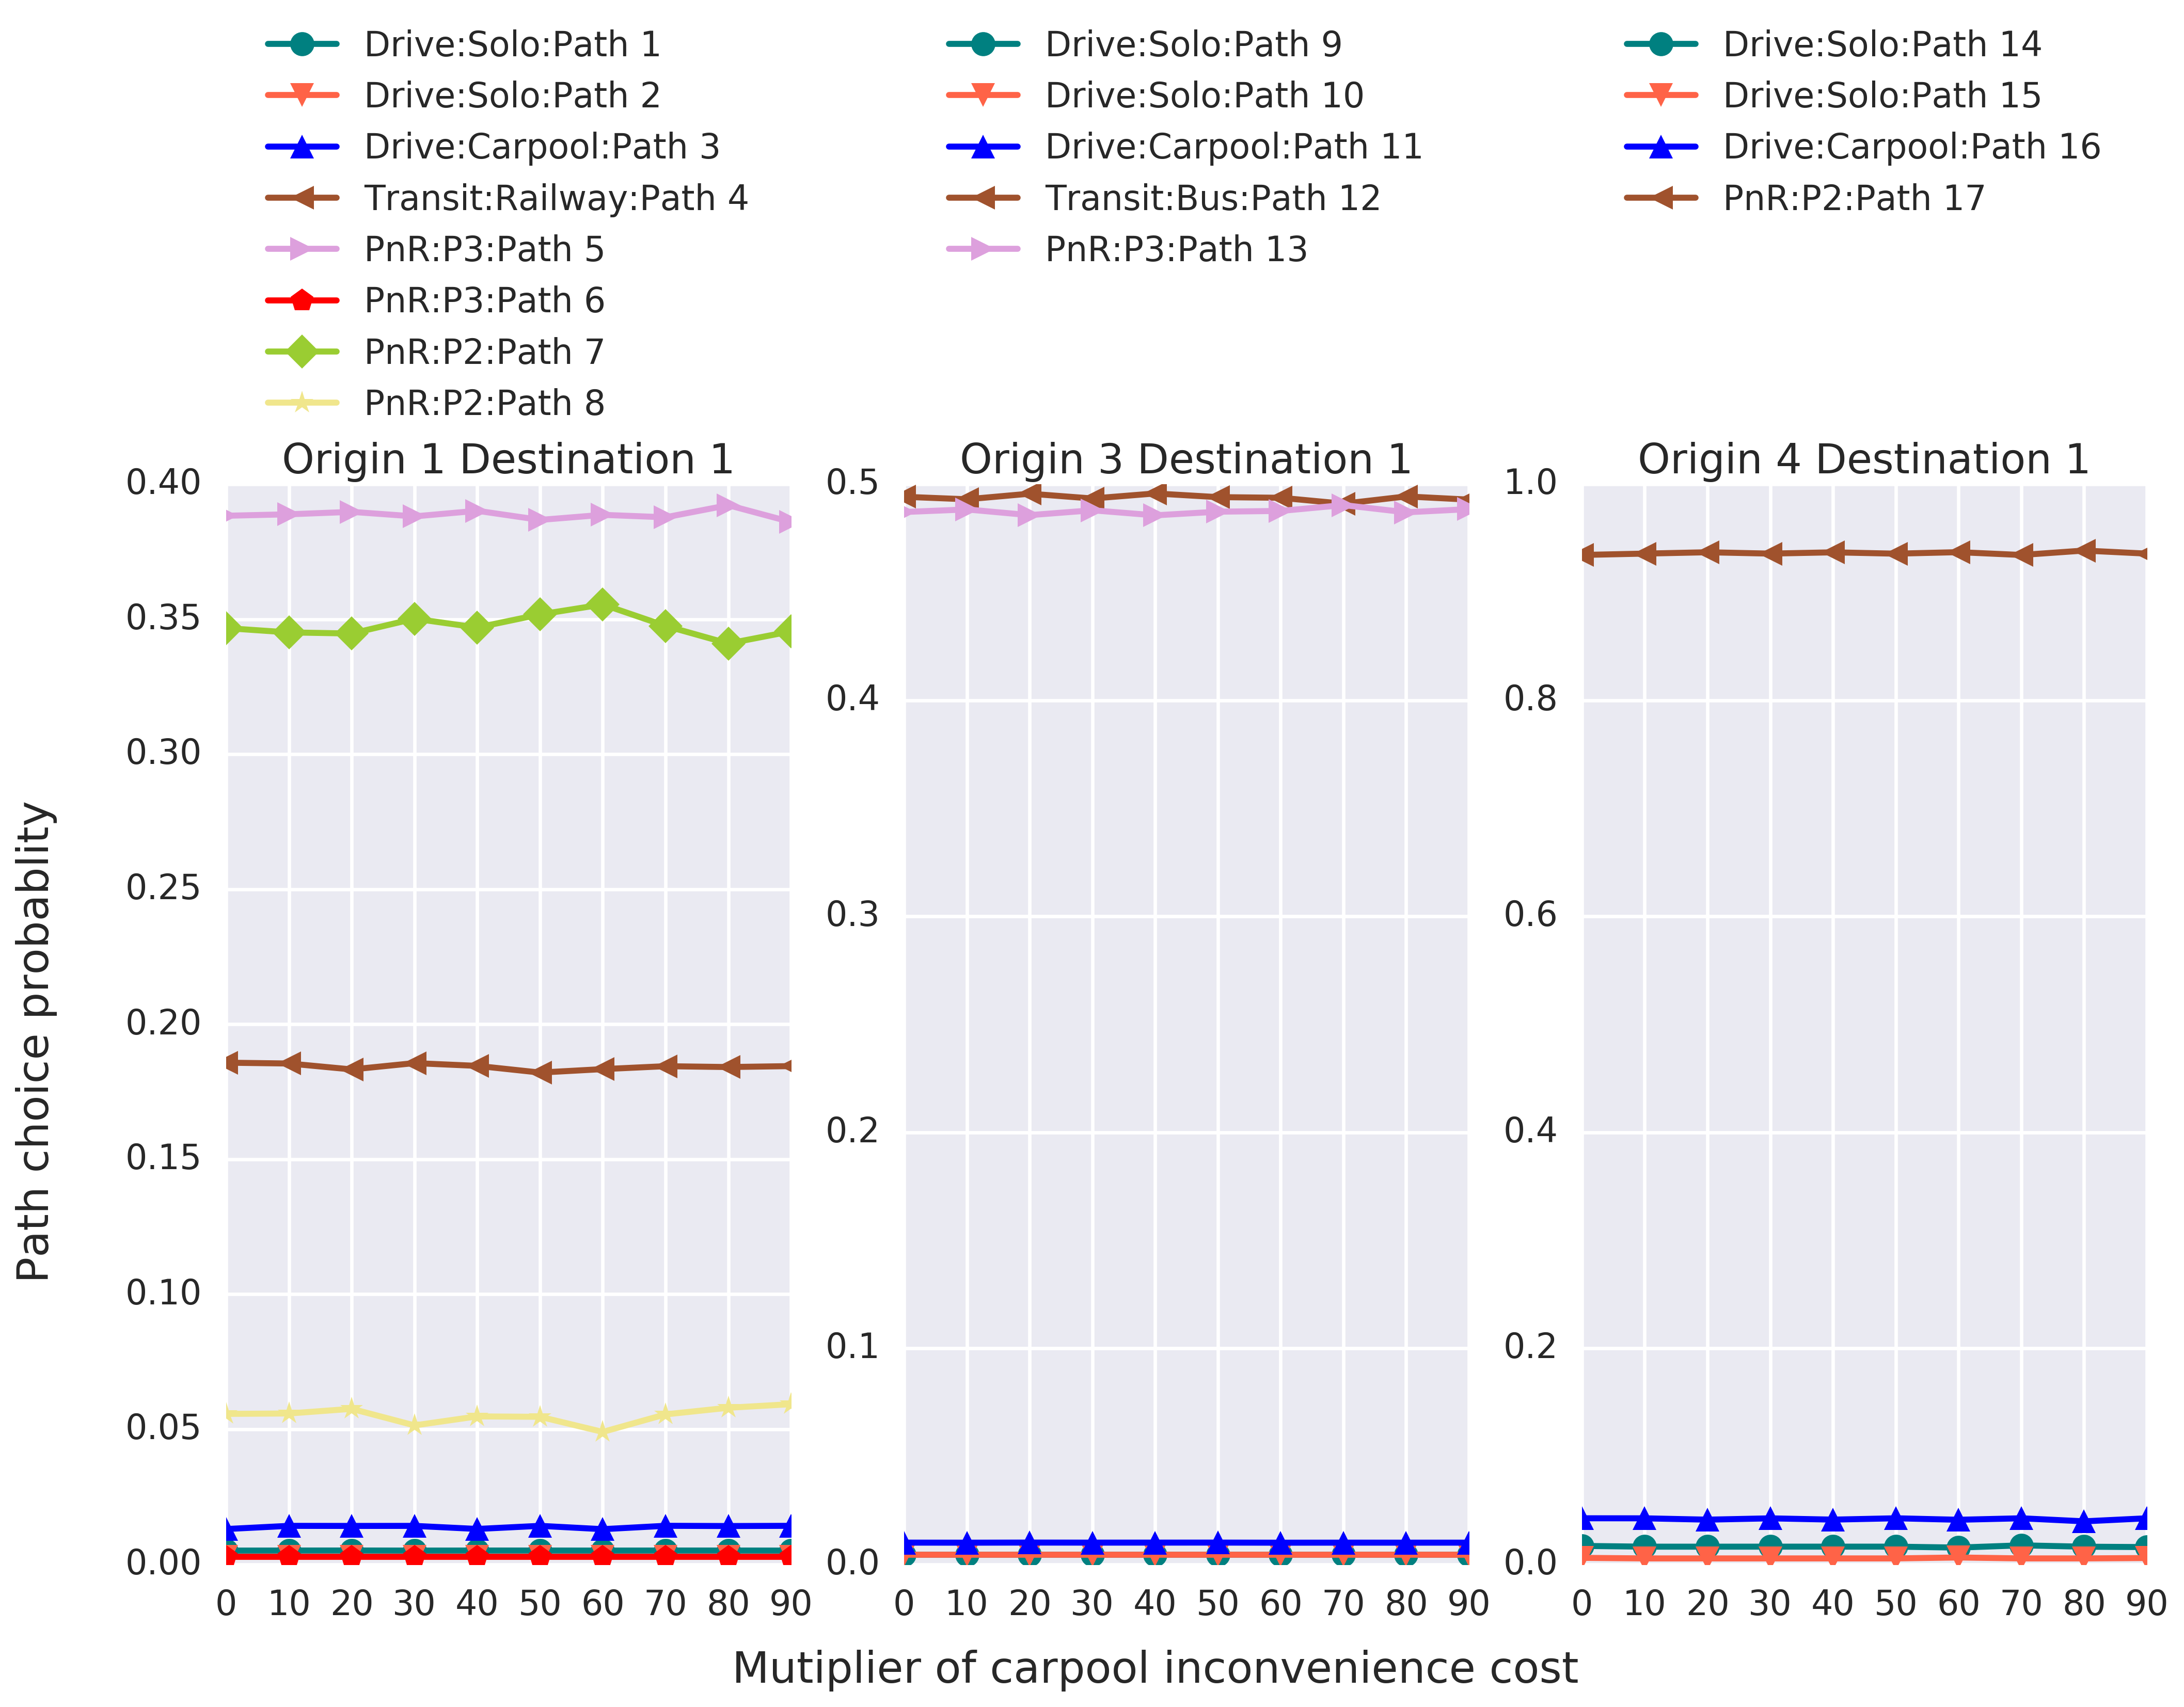

In [204]:
fig, axes = plt.subplots(1, 3, sharex=True,  figsize=(16, 9), dpi=300)
axes = axes.flatten()
for i, (O, D) in enumerate(OD_list):
    axe = axes[i]
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    tmp_df = res_df.iloc[:, tmp_path_idx_list]
    for j in range(len(tmp_path_idx_list)):
        axe.plot(through_level, tmp_df.iloc[:, j], label = path_des_list[tmp_path_idx_list[j]], 
                 color = color_list[j], marker = marker_list[j])
    axe.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=1, fancybox=True, shadow=True)
#     axe.set_ylabel('Path choice probablity')
#     axe.set_xlabel('Mutiplier of carpool inconvenience cost')
    axe.set_xlim(through_level[0], through_level[-1])
    axe.set_title('Origin ' + str(O) + ' Destination ' + str(D))
# plt.ylabel('Path choice probablity')
# plt.xlabel('Mutiplier of carpool inconvenience cost')
fig.text(0.5, 0.04, 'Mutiplier of carpool inconvenience cost', ha='center', fontsize = 20)
fig.text(0.04, 0.5, 'Path choice probablity', va='center', rotation='vertical', fontsize = 20)
plt.show()

## Trans

In [205]:
[path_matrix, Lambda_matrix, cost_matrix, gap_record] = pickle.load(open("MSAtrans" + str(5) +  
                                                                         "pnr" + str(5) +   "pool" + str(5) + '.pickle', 'rb'))

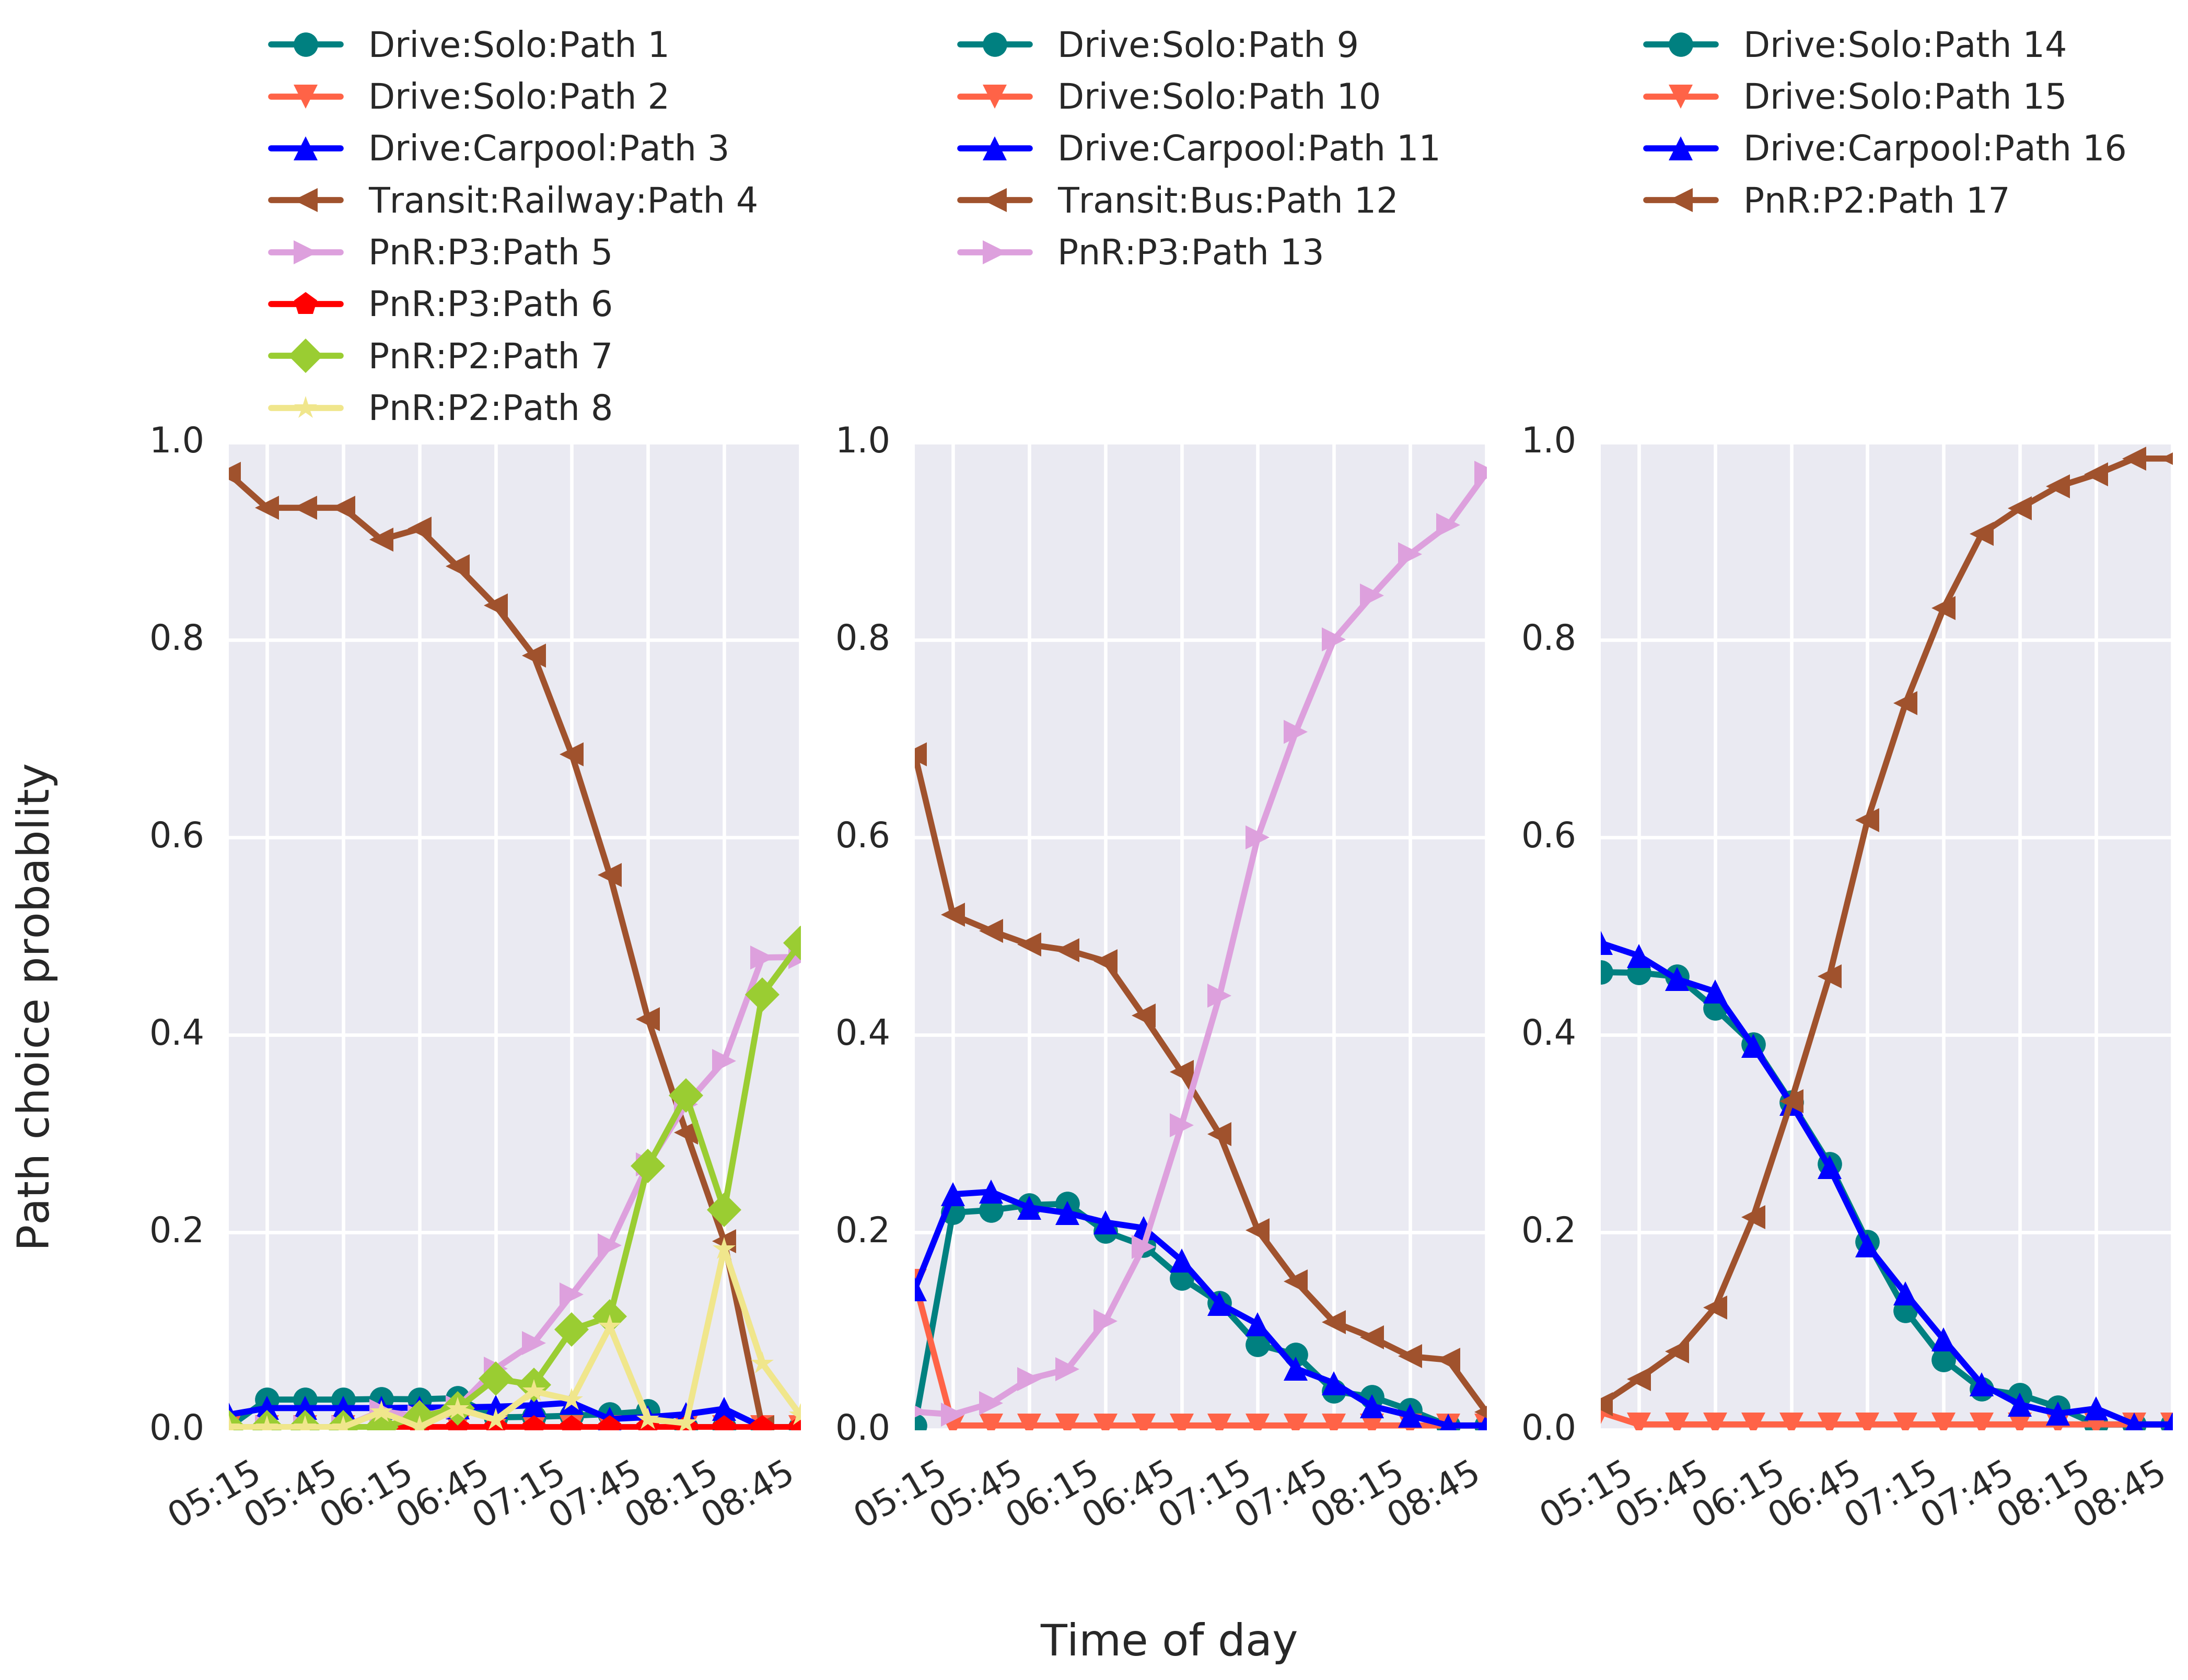

In [206]:
fig, axes = plt.subplots(1,3, sharex=True,  figsize=(16, 9), dpi=300)
for i, (O, D) in enumerate(OD_list):
    axe = axes[i]
    tmp_path_list = list(filter(lambda x: x.O == O and x.D == D, path_list))
    tmp_path_idx_list = list(map(lambda x: path_list.index(x), tmp_path_list))
    for j, idx in enumerate(tmp_path_idx_list):
#         axe.plot(x_axis, path_matrix[idx, :], label = path_des_list[idx], color = color_list[j], 
#                  marker = marker_list[j])
        axe.plot(x_axis, path_matrix[idx, :] / path_matrix[tmp_path_idx_list, :].sum(axis = 0), 
                     label = path_des_list[idx], color = color_list[j], marker = marker_list[j])
    axe.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45), ncol=1, fancybox=True, shadow=True)
#     axes[0].set_title('Path flow rate (vehs/15-min)')
#     axes[1].set_title('Path choice probablity')
#     axes[0].set_ylabel('Path flow rate (vehs/15-min)')
#     axes[0].set_xlabel('Time')
#     axes[1].set_ylabel('Path choice probablity')
#     axes[1].set_xlabel('Time')
#     axes[0].set_xlim(x_axis[0], x_axis[-1])
#     axes[1].set_xlim(x_axis[0], x_axis[-1])
    axe.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#     axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
fig.text(0.5, 0.04, 'Time of day', ha='center', fontsize = 20)
fig.text(0.04, 0.5, 'Path choice probablity', va='center', rotation='vertical', fontsize = 20)
plt.show()